# Part 2, Topic 1: CPA Attack on 32bit AES (HARDWARE)

---
NOTE: This lab references some (commercial) training material on [ChipWhisperer.io](https://www.ChipWhisperer.io). You can freely execute and use the lab per the open-source license (including using it in your own courses if you distribute similarly), but you must maintain notice about this source location. Consider joining our training course to enjoy the full experience.

---

Usual capture, just using MBEDTLS instead of TINYAES128

In [1]:
from platform import python_version
print (python_version())

3.7.10


In [2]:
import chipwhisperer as cw
print(cw.__version__)
print(scope)

5.6.1


NameError: name 'scope' is not defined

In [2]:
SCOPETYPE = 'OPENADC'
#PLATFORM = 'CW308_STM32L4' #'CWLITEARM'
#PLATFORM = 'CW308_STM32F4'
PLATFORM = 'CW308_STM32F3'

#CRYPTO_TARGET = "HWAES" #"MBEDTLS"
CRYPTO_TARGET = "MBEDTLS"
SS_VER = 'SS_VER_1_1'
#CHECK_CORR = False ##From CW_lite code


In [55]:
##Reset baud rate
print(target.baud)
reset_target(scope)

38400


USBErrorNoDevice: LIBUSB_ERROR_NO_DEVICE [-4]

In [3]:
%run "../../Setup_Scripts/Setup_Generic.ipynb"

See https://chipwhisperer.readthedocs.io/en/latest/api.html#firmware-update


INFO: Found ChipWhisperer😍


In [4]:
%%bash
cd ../../../hardware/victims/firmware/
mkdir -p simpleserial-aes-captureTrace_manoj_trials_f303_10kadd_mbed && cp -r simpleserial-aes/* $_

In [5]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../../../hardware/victims/firmware/simpleserial-aes-captureTrace_manoj_trials_f303_10kadd_mbed
make PLATFORM=$1 CRYPTO_TARGET=$2 SS_VER=$3

Building for platform CW308_STM32F3 with CRYPTO_TARGET=MBEDTLS
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CW308_STM32F3.hex
rm -f -- simpleserial-aes-CW308_STM32F3.eep
rm -f -- simpleserial-aes-CW308_STM32F3.cof
rm -f -- simpleserial-aes-CW308_STM32F3.elf
rm -f -- simpleserial-aes-CW308_STM32F3.map
rm -f -- simpleserial-aes-CW308_STM32F3.sym
rm -f -- simpleserial-aes-CW308_STM32F3.lss
rm -f -- objdir-CW308_STM32F3/*.o
rm -f -- objdir-CW308_STM32F3/*.lst
rm -f -- simpleserial-aes.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s aes-independant.s aes.s
rm -f -- simpleserial-aes.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d aes-independant.d aes.d
rm -f -- simpleserial-aes.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i aes-independant.i aes.i
mkdir -p .dep
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:9-2019-q4-0ubuntu1) 9.2.1 20191025

In file included from .././crypto/mbedtls//include/mbedtls/aes.h:27,
                 from .././crypto/aes-independant.c:206:
.././crypto/mbedtls//include/mbedtls/config.h:4915: warning: "MBEDTLS_SHA1_C" redefined
 4915 | #define MBEDTLS_SHA1_C
      | 
<command-line>: note: this is the location of the previous definition


In [6]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../../hardware/victims/firmware/simpleserial-aes-captureTrace_manoj_trials_f415_mbed
make PLATFORM=$1 CRYPTO_TARGET=$2

Building for platform CW308_STM32F4 with CRYPTO_TARGET=MBEDTLS
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CW308_STM32F4.hex
rm -f -- simpleserial-aes-CW308_STM32F4.eep
rm -f -- simpleserial-aes-CW308_STM32F4.cof
rm -f -- simpleserial-aes-CW308_STM32F4.elf
rm -f -- simpleserial-aes-CW308_STM32F4.map
rm -f -- simpleserial-aes-CW308_STM32F4.sym
rm -f -- simpleserial-aes-CW308_STM32F4.lss
rm -f -- objdir-CW308_STM32F4/*.o
rm -f -- objdir-CW308_STM32F4/*.lst
rm -f -- simpleserial-aes.s simpleserial.s stm32f4_hal.s stm32f4_hal_lowlevel.s stm32f4_sysmem.s stm32f4xx_hal_rng.s aes-independant.s aes.s
rm -f -- simpleserial-aes.d simpleserial.d stm32f4_hal.d stm32f4_hal_lowlevel.d stm32f4_sysmem.d stm32f4xx_hal_rng.d aes-independant.d aes.d
rm -f -- simpleserial-aes.i simpleserial.i stm32f4_hal.i stm32f4_hal_lowlevel.i stm32f4_sysmem.i stm32f4xx_hal_rng.i aes-independant.i aes.i
mkdir -p .dep
.
Welcome to another exciting ChipWhisperer target buil

In file included from .././hal/stm32f4/stm32f4_hal.c:3:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition
In file included from .././hal/stm32f4/stm32f4_hal_lowlevel.c:39:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition
.././hal/stm32f4/stm32f4xx_hal_rng.c: In function 'HAL_RNG_GenerateRandomNumber':
.././hal/stm32f4/stm32f4xx_hal_rng.c:264:17: warning: implicit declaration of function 'HAL_GetTick' [-Wimplicit-function-declaration]
  264 |     tickstart = HAL_GetTick();
      |                 ^~~~~~~~~~~
In file included from .././crypto/mbedtls//include/mbedtls/aes.h:27,
                 from .././crypto/aes-independant.c:206:
.././crypto/mbedtls//include/mbedtls/config.h:4915: warning: "MBEDTLS_SHA1_C" redefined
 4

In [6]:
fw_path = '../../../hardware/victims/firmware/simpleserial-aes-captureTrace_manoj_trials_f303_10kadd_mbed/simpleserial-aes-{}.hex'.format(PLATFORM)
cw.program_target(scope, prog, fw_path)

Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 16383 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 16383 bytes


In [7]:
print(scope.adc.presamples)
print(scope.adc.timeout)
print(scope.clock.adc_src)
print(scope.clock.adc_freq)
print(scope.clock.adc_rate)
print(scope.clock.adc_locked)
print(scope.clock.freq_ctr)
print(scope.clock.freq_ctr_src)
print(scope.clock.clkgen_src)
print(scope.clock.extclk_freq)
print(scope.clock.clkgen_mul)
print(scope.clock.clkgen_div)
print(scope.clock.clkgen_freq)
print(scope.gain)

0
2
clkgen_x4
29538459
29538459.0
True
0
extclk
system
10000000
2
26
7384615.384615385
mode = high
gain = 30
db   = 24.8359375



In [ ]:
#Adding 2000 samples before and after the AES execution
#scode.adc.samples = 10000
#scode.presamples  = 2000

In [8]:
print(cw.target(scope))
##Need to also change baud if changing frequency
## new_baud = (NewFreq(MHz)/7.3728)*38400
## Select clockgen_x1
target = cw.target(scope)
target.baud = 38400
scope.clock.clkgen_freq = 7.38e6
scope.clock.adc_src = "clkgen_x4"
#scope.gain.db = 30
print(target.baud)

SimpleSerial Settings =
	output_len             = 16
	baud                   = 38400
	simpleserial_last_read = 
	simpleserial_last_sent = 
	
38400


In [9]:
reset_target(scope)

In [10]:
print(target.baud)
print(scope.clock.clkgen_freq)
print(scope.clock.adc_src)

38400
7384615.384615385
clkgen_x4


In [11]:
scope.clock.clkgen_freq = 7.38e6 #5e6
print(scope.clock.clkgen_freq)

7384615.384615385


In [11]:
print(scope.adc.presamples)
print(scope.adc.timeout)
#scope.adc.decimate = 1
print(scope.adc.decimate)
print(scope.clock.adc_src)
print(scope.clock.adc_freq)
print(scope.clock.adc_rate)
print(scope.clock.adc_locked)
print(scope.clock.freq_ctr)
print(scope.clock.freq_ctr_src)
print(scope.clock.clkgen_src)
print(scope.clock.extclk_freq)
print(scope.clock.clkgen_mul)
print(scope.clock.clkgen_div)
print(scope.clock.clkgen_freq)
print(scope.gain)
print(scope.gain.mode)
print(scope.adc)
print(scope.clock)

0
2
1
clkgen_x4
29538459
29538459.0
True
0
extclk
system
10000000
2
26
7384615.384615385
mode = high
gain = 30
db   = 24.8359375

high
state          = False
basic_mode     = rising_edge
timeout        = 2
offset         = 0
presamples     = 0
samples        = 5000
decimate       = 1
trig_count     = 10673331
fifo_fill_mode = normal

adc_src       = clkgen_x4
adc_phase     = 0
adc_freq      = 29538459
adc_rate      = 29538459.0
adc_locked    = True
freq_ctr      = 0
freq_ctr_src  = extclk
clkgen_src    = system
extclk_freq   = 10000000
clkgen_mul    = 2
clkgen_div    = 26
clkgen_freq   = 7384615.384615385
clkgen_locked = True



In [12]:
##Without downsampling, trace_key_6000
scope.adc.samples = 6000 ##Number of samples to take
scope.adc.presamples = 0
scope.adc.decimate = 1

In [29]:
##For 1500 CW downsamples, trace_key_1500
scope.adc.decimate = 4
scope.adc.samples = 1500 ##Number of samples to take
scope.adc.presamples = 0

In [14]:
#Adding 2000 samples before and after the AES execution
scope.adc.samples = 10000
scope.adc.presamples  = 2000

In [60]:
scope.adc.timeout=100
print(scope.adc.timeout)

100


In [13]:
#Capture Traces
from tqdm import tnrange, trange
import numpy as np
import random
import time


ktp = cw.ktp.Basic()
ktp.fixed_key= False ##Ramdomizing the keys

N = 10000  # Number of traces

prjDir = "/mnt/hgfs/trace_key_f303_10kAdd/"

for firstKey in range(256):
    traces = []
    prjName = "key_" + str(firstKey)
    project = cw.create_project(prjDir + prjName + ".cwp", overwrite=True)
    
    for i in trange(N, desc='Capturing traces key=' + str(firstKey)):
        key, text = ktp.next()  # manual creation of a key, text pair can be substituted here
        key[0] = firstKey

        trace = cw.capture_trace(scope, target, text, key)
        if trace is None:
            continue
        project.traces.append(trace)

    #print("TrigCount = %s" %(scope.adc.trig_count))
    project.save()
#     for randomNum in random.sample(range(N), 2):
#         print("traceNum=%s\nkey=%s\ntextIn=%s\ntextOut=%s\ntrace=%s\n\n" %(\
#                                                                            randomNum,\
#                                                                            project.traces[randomNum].key,\
#                                                                            project.traces[randomNum].textin,\
#                                                                            project.traces[randomNum].textout,\
#                                                                            project.traces[randomNum].wave)\
#              )
    print("firstKey= %s\nproject saved at %s" %(firstKey, project.get_filename()))
    project.close()

Capturing traces key=0: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:54<00:00, 16.82it/s]


firstKey= 0
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_0.cwp


Capturing traces key=1: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:54<00:00, 16.83it/s]


firstKey= 1
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_1.cwp


Capturing traces key=2: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:54<00:00, 16.83it/s]


firstKey= 2
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_2.cwp


Capturing traces key=3: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 3
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_3.cwp


Capturing traces key=4: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 4
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_4.cwp


Capturing traces key=5: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 5
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_5.cwp


Capturing traces key=6: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 6
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_6.cwp


Capturing traces key=7: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 7
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_7.cwp


Capturing traces key=8: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 8
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_8.cwp


Capturing traces key=9: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 9
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_9.cwp


Capturing traces key=10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 10
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_10.cwp


Capturing traces key=11: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 11
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_11.cwp


Capturing traces key=12: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 12
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_12.cwp


Capturing traces key=13: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 13
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_13.cwp


Capturing traces key=14: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 14
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_14.cwp


Capturing traces key=15: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 15
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_15.cwp


Capturing traces key=16: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 16
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_16.cwp


Capturing traces key=17: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 17
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_17.cwp


Capturing traces key=18: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 18
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_18.cwp


Capturing traces key=19: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 19
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_19.cwp


Capturing traces key=20: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 20
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_20.cwp


Capturing traces key=21: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 21
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_21.cwp


Capturing traces key=22: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 22
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_22.cwp


Capturing traces key=23: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 23
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_23.cwp


Capturing traces key=24: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 24
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_24.cwp


Capturing traces key=25: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 25
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_25.cwp


Capturing traces key=26: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 26
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_26.cwp


Capturing traces key=27: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.79it/s]


firstKey= 27
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_27.cwp


Capturing traces key=28: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 28
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_28.cwp


Capturing traces key=29: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 29
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_29.cwp


Capturing traces key=30: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 30
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_30.cwp


Capturing traces key=31: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 31
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_31.cwp


Capturing traces key=32: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 32
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_32.cwp


Capturing traces key=33: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 33
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_33.cwp


Capturing traces key=34: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 34
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_34.cwp


Capturing traces key=35: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 35
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_35.cwp


Capturing traces key=36: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 36
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_36.cwp


Capturing traces key=37: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 37
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_37.cwp


Capturing traces key=38: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 38
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_38.cwp


Capturing traces key=39: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 39
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_39.cwp


Capturing traces key=40: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 40
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_40.cwp


Capturing traces key=41: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 41
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_41.cwp


Capturing traces key=42: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 42
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_42.cwp


Capturing traces key=43: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 43
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_43.cwp


Capturing traces key=44: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 44
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_44.cwp


Capturing traces key=45: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 45
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_45.cwp


Capturing traces key=46: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 46
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_46.cwp


Capturing traces key=47: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 47
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_47.cwp


Capturing traces key=48: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 48
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_48.cwp


Capturing traces key=49: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 49
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_49.cwp


Capturing traces key=50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 50
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_50.cwp


Capturing traces key=51: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 51
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_51.cwp


Capturing traces key=52: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 52
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_52.cwp


Capturing traces key=53: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 53
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_53.cwp


Capturing traces key=54: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 54
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_54.cwp


Capturing traces key=55: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 55
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_55.cwp


Capturing traces key=56: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 56
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_56.cwp


Capturing traces key=57: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 57
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_57.cwp


Capturing traces key=58: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 58
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_58.cwp


Capturing traces key=59: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 59
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_59.cwp


Capturing traces key=60: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 60
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_60.cwp


Capturing traces key=61: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 61
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_61.cwp


Capturing traces key=62: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 62
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_62.cwp


Capturing traces key=63: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 63
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_63.cwp


Capturing traces key=64: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 64
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_64.cwp


Capturing traces key=65: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 65
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_65.cwp


Capturing traces key=66: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 66
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_66.cwp


Capturing traces key=67: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 67
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_67.cwp


Capturing traces key=68: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 68
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_68.cwp


Capturing traces key=69: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 69
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_69.cwp


Capturing traces key=70: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 70
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_70.cwp


Capturing traces key=71: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 71
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_71.cwp


Capturing traces key=72: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 72
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_72.cwp


Capturing traces key=73: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 73
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_73.cwp


Capturing traces key=74: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 74
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_74.cwp


Capturing traces key=75: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 75
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_75.cwp


Capturing traces key=76: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 76
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_76.cwp


Capturing traces key=77: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 77
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_77.cwp


Capturing traces key=78: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 78
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_78.cwp


Capturing traces key=79: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 79
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_79.cwp


Capturing traces key=80: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 80
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_80.cwp


Capturing traces key=81: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 81
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_81.cwp


Capturing traces key=82: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 82
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_82.cwp


Capturing traces key=83: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 83
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_83.cwp


Capturing traces key=84: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 84
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_84.cwp


Capturing traces key=85: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 85
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_85.cwp


Capturing traces key=86: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 86
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_86.cwp


Capturing traces key=87: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 87
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_87.cwp


Capturing traces key=88: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 88
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_88.cwp


Capturing traces key=89: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 89
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_89.cwp


Capturing traces key=90: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 90
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_90.cwp


Capturing traces key=91: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [10:01<00:00, 16.63it/s]


firstKey= 91
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_91.cwp


Capturing traces key=92: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [10:04<00:00, 16.54it/s]


firstKey= 92
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_92.cwp


Capturing traces key=93: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.80it/s]


firstKey= 93
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_93.cwp


Capturing traces key=94: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.80it/s]


firstKey= 94
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_94.cwp


Capturing traces key=95: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:54<00:00, 16.81it/s]


firstKey= 95
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_95.cwp


Capturing traces key=96: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 96
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_96.cwp


Capturing traces key=97: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 97
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_97.cwp


Capturing traces key=98: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 98
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_98.cwp


Capturing traces key=99: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 99
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_99.cwp


Capturing traces key=100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 100
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_100.cwp


Capturing traces key=101: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.80it/s]


firstKey= 101
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_101.cwp


Capturing traces key=102: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.81it/s]


firstKey= 102
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_102.cwp


Capturing traces key=103: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 103
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_103.cwp


Capturing traces key=104: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 104
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_104.cwp


Capturing traces key=105: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 105
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_105.cwp


Capturing traces key=106: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:54<00:00, 16.82it/s]


firstKey= 106
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_106.cwp


Capturing traces key=107: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:54<00:00, 16.81it/s]


firstKey= 107
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_107.cwp


Capturing traces key=108: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 108
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_108.cwp


Capturing traces key=109: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 109
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_109.cwp


Capturing traces key=110: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 110
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_110.cwp


Capturing traces key=111: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 111
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_111.cwp


Capturing traces key=112: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 112
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_112.cwp


Capturing traces key=113: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.73it/s]


firstKey= 113
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_113.cwp


Capturing traces key=114: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 114
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_114.cwp


Capturing traces key=115: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 115
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_115.cwp


Capturing traces key=116: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 116
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_116.cwp


Capturing traces key=117: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 117
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_117.cwp


Capturing traces key=118: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 118
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_118.cwp


Capturing traces key=119: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 119
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_119.cwp


Capturing traces key=120: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 120
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_120.cwp


Capturing traces key=121: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 121
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_121.cwp


Capturing traces key=122: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 122
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_122.cwp


Capturing traces key=123: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 123
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_123.cwp


Capturing traces key=124: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 124
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_124.cwp


Capturing traces key=125: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 125
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_125.cwp


Capturing traces key=126: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 126
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_126.cwp


Capturing traces key=127: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 127
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_127.cwp


Capturing traces key=128: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 128
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_128.cwp


Capturing traces key=129: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 129
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_129.cwp


Capturing traces key=130: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 130
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_130.cwp


Capturing traces key=131: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 131
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_131.cwp


Capturing traces key=132: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 132
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_132.cwp


Capturing traces key=133: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 133
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_133.cwp


Capturing traces key=134: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 134
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_134.cwp


Capturing traces key=135: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 135
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_135.cwp


Capturing traces key=136: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 136
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_136.cwp


Capturing traces key=137: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.78it/s]


firstKey= 137
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_137.cwp


Capturing traces key=138: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 138
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_138.cwp


Capturing traces key=139: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 139
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_139.cwp


Capturing traces key=140: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 140
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_140.cwp


Capturing traces key=141: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 141
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_141.cwp


Capturing traces key=142: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 142
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_142.cwp


Capturing traces key=143: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 143
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_143.cwp


Capturing traces key=144: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 144
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_144.cwp


Capturing traces key=145: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 145
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_145.cwp


Capturing traces key=146: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 146
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_146.cwp


Capturing traces key=147: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.73it/s]


firstKey= 147
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_147.cwp


Capturing traces key=148: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 148
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_148.cwp


Capturing traces key=149: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 149
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_149.cwp


Capturing traces key=150: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 150
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_150.cwp


Capturing traces key=151: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 151
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_151.cwp


Capturing traces key=152: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 152
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_152.cwp


Capturing traces key=153: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 153
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_153.cwp


Capturing traces key=154: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 154
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_154.cwp


Capturing traces key=155: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 155
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_155.cwp


Capturing traces key=156: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.78it/s]


firstKey= 156
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_156.cwp


Capturing traces key=157: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 157
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_157.cwp


Capturing traces key=158: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 158
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_158.cwp


Capturing traces key=159: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 159
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_159.cwp


Capturing traces key=160: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 160
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_160.cwp


Capturing traces key=161: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 161
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_161.cwp


Capturing traces key=162: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 162
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_162.cwp


Capturing traces key=163: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 163
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_163.cwp


Capturing traces key=164: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 164
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_164.cwp


Capturing traces key=165: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 165
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_165.cwp


Capturing traces key=166: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 166
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_166.cwp


Capturing traces key=167: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 167
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_167.cwp


Capturing traces key=168: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 168
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_168.cwp


Capturing traces key=169: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 169
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_169.cwp


Capturing traces key=170: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 170
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_170.cwp


Capturing traces key=171: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 171
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_171.cwp


Capturing traces key=172: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 172
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_172.cwp


Capturing traces key=173: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 173
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_173.cwp


Capturing traces key=174: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 174
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_174.cwp


Capturing traces key=175: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 175
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_175.cwp


Capturing traces key=176: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 176
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_176.cwp


Capturing traces key=177: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 177
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_177.cwp


Capturing traces key=178: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 178
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_178.cwp


Capturing traces key=179: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 179
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_179.cwp


Capturing traces key=180: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 180
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_180.cwp


Capturing traces key=181: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 181
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_181.cwp


Capturing traces key=182: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:55<00:00, 16.79it/s]


firstKey= 182
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_182.cwp


Capturing traces key=183: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 183
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_183.cwp


Capturing traces key=184: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 184
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_184.cwp


Capturing traces key=185: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 185
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_185.cwp


Capturing traces key=186: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 186
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_186.cwp


Capturing traces key=187: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 187
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_187.cwp


Capturing traces key=188: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 188
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_188.cwp


Capturing traces key=189: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 189
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_189.cwp


Capturing traces key=190: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 190
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_190.cwp


Capturing traces key=191: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 191
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_191.cwp


Capturing traces key=192: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 192
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_192.cwp


Capturing traces key=193: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 193
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_193.cwp


Capturing traces key=194: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 194
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_194.cwp


Capturing traces key=195: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 195
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_195.cwp


Capturing traces key=196: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 196
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_196.cwp


Capturing traces key=197: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 197
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_197.cwp


Capturing traces key=198: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 198
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_198.cwp


Capturing traces key=199: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 199
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_199.cwp


Capturing traces key=200: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 200
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_200.cwp


Capturing traces key=201: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 201
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_201.cwp


Capturing traces key=202: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.73it/s]


firstKey= 202
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_202.cwp


Capturing traces key=203: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 203
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_203.cwp


Capturing traces key=204: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 204
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_204.cwp


Capturing traces key=205: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 205
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_205.cwp


Capturing traces key=206: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 206
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_206.cwp


Capturing traces key=207: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 207
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_207.cwp


Capturing traces key=208: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 208
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_208.cwp


Capturing traces key=209: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 209
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_209.cwp


Capturing traces key=210: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 210
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_210.cwp


Capturing traces key=211: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 211
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_211.cwp


Capturing traces key=212: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 212
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_212.cwp


Capturing traces key=213: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.72it/s]


firstKey= 213
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_213.cwp


Capturing traces key=214: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 214
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_214.cwp


Capturing traces key=215: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 215
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_215.cwp


Capturing traces key=216: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 216
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_216.cwp


Capturing traces key=217: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 217
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_217.cwp


Capturing traces key=218: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 218
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_218.cwp


Capturing traces key=219: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 219
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_219.cwp


Capturing traces key=220: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 220
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_220.cwp


Capturing traces key=221: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 221
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_221.cwp


Capturing traces key=222: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 222
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_222.cwp


Capturing traces key=223: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 223
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_223.cwp


Capturing traces key=224: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 224
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_224.cwp


Capturing traces key=225: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 225
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_225.cwp


Capturing traces key=226: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 226
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_226.cwp


Capturing traces key=227: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 227
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_227.cwp


Capturing traces key=228: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 228
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_228.cwp


Capturing traces key=229: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 229
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_229.cwp


Capturing traces key=230: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 230
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_230.cwp


Capturing traces key=231: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 231
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_231.cwp


Capturing traces key=232: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 232
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_232.cwp


Capturing traces key=233: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 233
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_233.cwp


Capturing traces key=234: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.73it/s]


firstKey= 234
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_234.cwp


Capturing traces key=235: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 235
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_235.cwp


Capturing traces key=236: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 236
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_236.cwp


Capturing traces key=237: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 237
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_237.cwp


Capturing traces key=238: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 238
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_238.cwp


Capturing traces key=239: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 239
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_239.cwp


Capturing traces key=240: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 240
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_240.cwp


Capturing traces key=241: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 241
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_241.cwp


Capturing traces key=242: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 242
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_242.cwp


Capturing traces key=243: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 243
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_243.cwp


Capturing traces key=244: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 244
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_244.cwp


Capturing traces key=245: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 245
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_245.cwp


Capturing traces key=246: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 246
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_246.cwp


Capturing traces key=247: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 247
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_247.cwp


Capturing traces key=248: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 248
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_248.cwp


Capturing traces key=249: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 249
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_249.cwp


Capturing traces key=250: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


firstKey= 250
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_250.cwp


Capturing traces key=251: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 251
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_251.cwp


Capturing traces key=252: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.75it/s]


firstKey= 252
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_252.cwp


Capturing traces key=253: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


firstKey= 253
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_253.cwp


Capturing traces key=254: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:57<00:00, 16.74it/s]


firstKey= 254
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_254.cwp


Capturing traces key=255: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [09:56<00:00, 16.75it/s]


firstKey= 255
project saved at /mnt/hgfs/trace_key_f303_10kAdd/key_255.cwp


In [12]:
print(ktp.fixed_text)
print(ktp.fixed_key)

False
False


/mnt/hgfs/trace_key_f303_10kAdd


/home/manojgopale/.local/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/manojgopale/.local/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/manojgopale/.local/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/manojgopale/.local/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[ 27 203 182  12 247  61  37  14 110  68 204 176 156 189  19  82]')

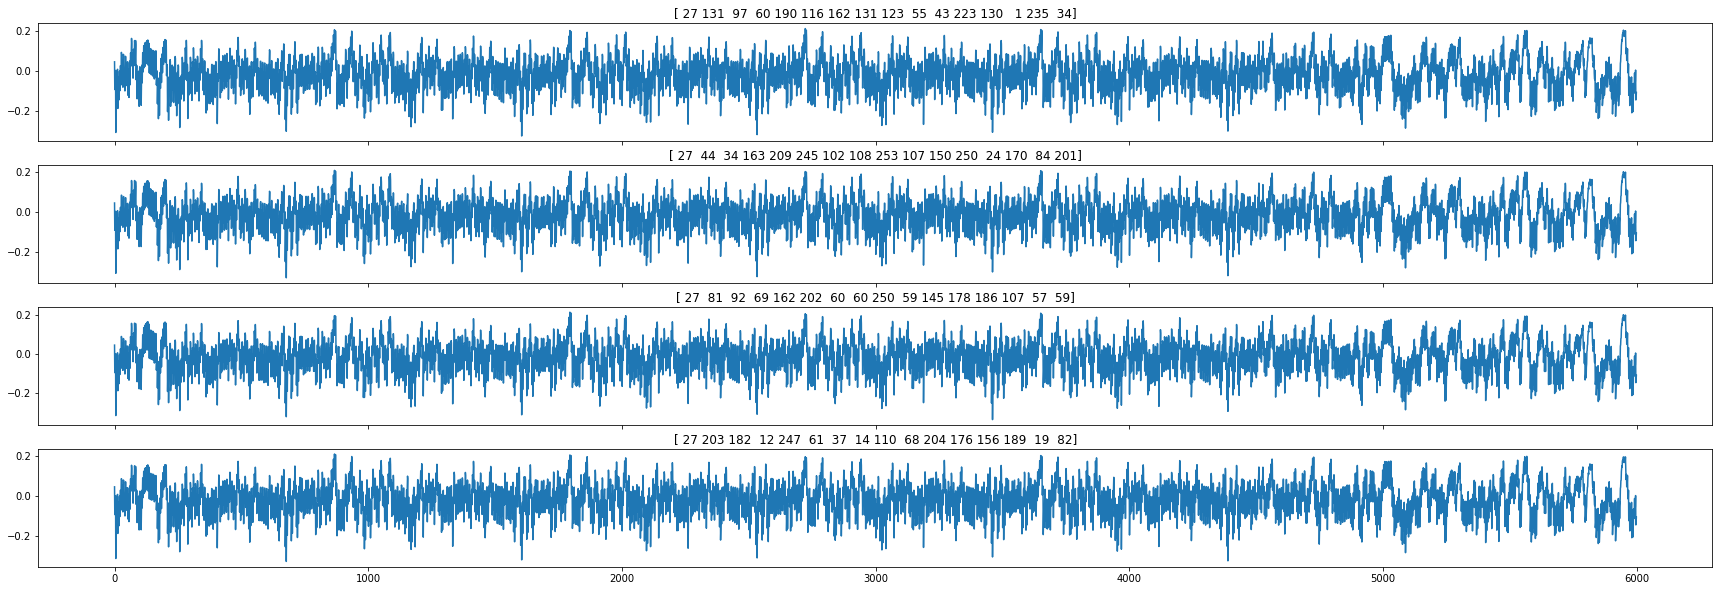

In [14]:
##Manoj
##Check the traces
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

project = cw.open_project("/mnt/hgfs/trace_key_f303_10kAdd/key_27.cwp")
print(project.location)
xShape = project.traces[0].wave.shape[0]
x=np.linspace(0,xShape-1, xShape)

#savePath = "/home/manojgopale/Documents/chipwhisperer/jupyter/courses/sca201/img/sca201_images/" + prjName + ".jpg"

fig, axs = plt.subplots(4, sharex=True, figsize=(30,10))
axs[0].plot(x,project.traces[0].wave)
axs[0].set_title(project.traces[0].key)
axs[1].plot(x,project.traces[1].wave)
axs[1].set_title(project.traces[1].key)
axs[2].plot(x,project.traces[8].wave)
axs[2].set_title(project.traces[8].key)
axs[3].plot(x,project.traces[9].wave)
axs[3].set_title(project.traces[9].key)
#print(proj.traces[0].wave.shape)

#fig.savefig(savePath)

In [27]:
project = cw.open_project("/mnt/hgfs/trace_key_trials/key_27.cwp")
trace_0 = project.traces[0].wave
print("maxVal= %s, minVal= %s" %(trace_0.max(), trace_0.min()))
minIdx = trace_0==-0.5
print("minIdx=%s" %(trace_0[minIdx].shape))

maxVal= 0.259765625, minVal= -0.5
minIdx=1


In [ ]:
## Use this to save to npz, pkl format is not compatible across different versions of python.
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os
import numpy as np

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])

trainSize= 7500
devSize = 500
testSize = 500
# ##Adding traces for not complete 
# keysNotDone = [204, 228, 244, 245]
# count = 0
prjDir = "/mnt/hgfs/trace_key_f303_10kAdd/"
saveDir = "/mnt/hgfs/cw_f303_6000_10kAdd_dataset/"

for keyVal in trange(256, desc='Splitting data'):
    df_new = pd.DataFrame(columns=['trace', 'key'])
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
    
    ##Shuffle the dataframe before splitting in test, dev and train
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    ##Split it in train, dev and test
    df_train = df_new.iloc[0:trainSize, : ].reset_index(drop=True)
    df_dev   = df_new.iloc[trainSize:trainSize+devSize, : ].reset_index(drop=True)
    df_test  = df_new.iloc[trainSize+devSize:trainSize+devSize+testSize, : ].reset_index(drop=True)
    
    ##Save it to pkl
    saveTrain = saveDir + "/train_" + str(keyVal) + ".npz"
    saveDev   = saveDir + "/dev_" + str(keyVal) + ".npz"
    saveTest  = saveDir + "/test_" + str(keyVal) + ".npz"

    if (not os.path.exists(saveTrain)):
        np.savez_compressed(saveTrain, data=df_train)
        print("Saved key= %s to %s" %(keyVal, saveTrain))
        
    if (not os.path.exists(saveDev)):
        np.savez_compressed(saveDev, data=df_dev)
        print("Saved key= %s to %s" %(keyVal, saveDev))
    
    if (not os.path.exists(saveTest)):
        np.savez_compressed(saveTest, data=df_test)
        print("Saved key= %s to %s" %(keyVal, saveTest))

    print("Done saving files for key= %s" %(keyVal))
    ##Clean al dataframe's before next loop
    df_new = df_new.drop(df_new.columns, axis=1)
    df_train = None
    df_dev = None
    df_test = None


## Add these to the csv files.
print("Done saving all the traces\n")

Splitting data:   0%|                                                                                                                     | 0/256 [00:00<?, ?it/s]

Started key= 0
Saved key= 0 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_0.npz
Saved key= 0 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_0.npz


Splitting data:   0%|▍                                                                                                          | 1/256 [01:06<4:44:17, 66.89s/it]

Saved key= 0 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_0.npz
Done saving files for key= 0
Started key= 1
Saved key= 1 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_1.npz
Saved key= 1 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_1.npz


Splitting data:   1%|▊                                                                                                          | 2/256 [02:05<4:22:48, 62.08s/it]

Saved key= 1 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_1.npz
Done saving files for key= 1
Started key= 2
Saved key= 2 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_2.npz
Saved key= 2 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_2.npz


Splitting data:   1%|█▎                                                                                                         | 3/256 [03:03<4:13:22, 60.09s/it]

Saved key= 2 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_2.npz
Done saving files for key= 2
Started key= 3
Saved key= 3 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_3.npz
Saved key= 3 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_3.npz


Splitting data:   2%|█▋                                                                                                         | 4/256 [04:02<4:11:06, 59.79s/it]

Saved key= 3 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_3.npz
Done saving files for key= 3
Started key= 4
Saved key= 4 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_4.npz
Saved key= 4 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_4.npz


Splitting data:   2%|██                                                                                                         | 5/256 [05:03<4:12:09, 60.28s/it]

Saved key= 4 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_4.npz
Done saving files for key= 4
Started key= 5
Saved key= 5 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_5.npz
Saved key= 5 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_5.npz


Splitting data:   2%|██▌                                                                                                        | 6/256 [06:03<4:10:04, 60.02s/it]

Saved key= 5 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_5.npz
Done saving files for key= 5
Started key= 6
Saved key= 6 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_6.npz
Saved key= 6 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_6.npz


Splitting data:   3%|██▌                                                                                            | 7/256 [124:33:15<10133:47:41, 146512.70s/it]

Saved key= 6 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_6.npz
Done saving files for key= 6
Started key= 7
Saved key= 7 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_7.npz
Saved key= 7 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_7.npz


Splitting data:   3%|███                                                                                              | 8/256 [124:34:15<6881:14:21, 99888.96s/it]

Saved key= 7 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_7.npz
Done saving files for key= 7
Started key= 8
Saved key= 8 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_8.npz
Saved key= 8 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_8.npz


Splitting data:   4%|███▍                                                                                             | 9/256 [124:35:13<4712:14:23, 68680.42s/it]

Saved key= 8 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_8.npz
Done saving files for key= 8
Started key= 9
Saved key= 9 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_9.npz
Saved key= 9 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_9.npz
Saved key= 9 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_9.npz
Done saving files for key= 9


Splitting data:   4%|███▊                                                                                            | 10/256 [124:36:26<3245:49:04, 47499.77s/it]

Started key= 10
Saved key= 10 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_10.npz
Saved key= 10 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_10.npz


Splitting data:   4%|████▏                                                                                           | 11/256 [124:37:28<2244:34:01, 32981.40s/it]

Saved key= 10 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_10.npz
Done saving files for key= 10
Started key= 11
Saved key= 11 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_11.npz
Saved key= 11 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_11.npz


Splitting data:   5%|████▌                                                                                           | 12/256 [124:38:23<1556:30:21, 22964.84s/it]

Saved key= 11 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_11.npz
Done saving files for key= 11
Started key= 12
Saved key= 12 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_12.npz
Saved key= 12 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_12.npz


Splitting data:   5%|████▉                                                                                           | 13/256 [124:39:20<1081:42:58, 16025.43s/it]

Saved key= 12 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_12.npz
Done saving files for key= 12
Started key= 13
Saved key= 13 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_13.npz
Saved key= 13 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_13.npz


Splitting data:   5%|█████▎                                                                                           | 14/256 [124:40:14<752:58:05, 11201.18s/it]

Saved key= 13 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_13.npz
Done saving files for key= 13
Started key= 14
Saved key= 14 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_14.npz
Saved key= 14 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_14.npz


Splitting data:   6%|█████▋                                                                                            | 15/256 [124:41:08<524:55:36, 7841.23s/it]

Saved key= 14 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_14.npz
Done saving files for key= 14
Started key= 15
Saved key= 15 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_15.npz
Saved key= 15 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_15.npz


Splitting data:   6%|██████▏                                                                                           | 16/256 [124:42:03<366:29:55, 5497.48s/it]

Saved key= 15 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_15.npz
Done saving files for key= 15
Started key= 16
Saved key= 16 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_16.npz
Saved key= 16 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_16.npz


Splitting data:   7%|██████▌                                                                                           | 17/256 [124:42:58<256:18:46, 3860.78s/it]

Saved key= 16 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_16.npz
Done saving files for key= 16
Started key= 17
Saved key= 17 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_17.npz
Saved key= 17 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_17.npz


Splitting data:   7%|██████▉                                                                                           | 18/256 [124:43:52<179:37:07, 2716.92s/it]

Saved key= 17 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_17.npz
Done saving files for key= 17
Started key= 18
Saved key= 18 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_18.npz
Saved key= 18 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_18.npz


Splitting data:   7%|███████▎                                                                                          | 19/256 [124:44:46<126:12:44, 1917.15s/it]

Saved key= 18 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_18.npz
Done saving files for key= 18
Started key= 19
Saved key= 19 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_19.npz
Saved key= 19 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_19.npz


Splitting data:   8%|███████▋                                                                                           | 20/256 [124:45:41<89:02:28, 1358.26s/it]

Saved key= 19 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_19.npz
Done saving files for key= 19
Started key= 20
Saved key= 20 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_20.npz
Saved key= 20 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_20.npz


Splitting data:   8%|████████▏                                                                                           | 21/256 [124:46:36<63:06:38, 966.80s/it]

Saved key= 20 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_20.npz
Done saving files for key= 20
Started key= 21
Saved key= 21 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_21.npz
Saved key= 21 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_21.npz


Splitting data:   9%|████████▌                                                                                           | 22/256 [124:47:30<45:02:06, 692.85s/it]

Saved key= 21 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_21.npz
Done saving files for key= 21
Started key= 22
Saved key= 22 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_22.npz
Saved key= 22 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_22.npz


Splitting data:   9%|████████▉                                                                                           | 23/256 [124:48:23<32:25:54, 501.09s/it]

Saved key= 22 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_22.npz
Done saving files for key= 22
Started key= 23
Saved key= 23 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_23.npz
Saved key= 23 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_23.npz


Splitting data:   9%|█████████▍                                                                                          | 24/256 [124:49:18<23:39:05, 367.01s/it]

Saved key= 23 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_23.npz
Done saving files for key= 23
Started key= 24
Saved key= 24 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_24.npz
Saved key= 24 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_24.npz


Splitting data:  10%|█████████▊                                                                                          | 25/256 [124:50:13<17:32:30, 273.38s/it]

Saved key= 24 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_24.npz
Done saving files for key= 24
Started key= 25
Saved key= 25 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_25.npz
Saved key= 25 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_25.npz


Splitting data:  10%|██████████▏                                                                                         | 26/256 [124:51:07<13:16:05, 207.68s/it]

Saved key= 25 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_25.npz
Done saving files for key= 25
Started key= 26
Saved key= 26 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_26.npz
Saved key= 26 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_26.npz


Splitting data:  11%|██████████▌                                                                                         | 27/256 [124:52:04<10:20:19, 162.53s/it]

Saved key= 26 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_26.npz
Done saving files for key= 26
Started key= 27
Saved key= 27 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_27.npz
Saved key= 27 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_27.npz


Splitting data:  11%|███████████                                                                                          | 28/256 [124:53:03<8:18:51, 131.28s/it]

Saved key= 27 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_27.npz
Done saving files for key= 27
Started key= 28
Saved key= 28 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_28.npz
Saved key= 28 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_28.npz


Splitting data:  11%|███████████▍                                                                                         | 29/256 [124:54:01<6:54:28, 109.55s/it]

Saved key= 28 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_28.npz
Done saving files for key= 28
Started key= 29
Saved key= 29 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_29.npz
Saved key= 29 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_29.npz


Splitting data:  12%|███████████▉                                                                                          | 30/256 [124:55:01<5:56:31, 94.65s/it]

Saved key= 29 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_29.npz
Done saving files for key= 29
Started key= 30
Saved key= 30 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_30.npz
Saved key= 30 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_30.npz


Splitting data:  12%|████████████▎                                                                                         | 31/256 [124:55:59<5:13:27, 83.59s/it]

Saved key= 30 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_30.npz
Done saving files for key= 30
Started key= 31
Saved key= 31 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_31.npz
Saved key= 31 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_31.npz


Splitting data:  12%|████████████▊                                                                                         | 32/256 [124:56:58<4:44:53, 76.31s/it]

Saved key= 31 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_31.npz
Done saving files for key= 31
Started key= 32
Saved key= 32 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_32.npz
Saved key= 32 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_32.npz


Splitting data:  13%|█████████████▏                                                                                        | 33/256 [124:57:56<4:22:56, 70.75s/it]

Saved key= 32 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_32.npz
Done saving files for key= 32
Started key= 33
Saved key= 33 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_33.npz
Saved key= 33 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_33.npz


Splitting data:  13%|█████████████▌                                                                                        | 34/256 [124:58:54<4:07:09, 66.80s/it]

Saved key= 33 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_33.npz
Done saving files for key= 33
Started key= 34
Saved key= 34 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_34.npz
Saved key= 34 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_34.npz


Splitting data:  14%|█████████████▉                                                                                        | 35/256 [124:59:52<3:56:56, 64.33s/it]

Saved key= 34 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_34.npz
Done saving files for key= 34
Started key= 35
Saved key= 35 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_35.npz
Saved key= 35 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_35.npz


Splitting data:  14%|██████████████▎                                                                                       | 36/256 [125:00:51<3:49:59, 62.73s/it]

Saved key= 35 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_35.npz
Done saving files for key= 35
Started key= 36
Saved key= 36 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_36.npz
Saved key= 36 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_36.npz


Splitting data:  14%|██████████████▋                                                                                       | 37/256 [125:01:50<3:44:28, 61.50s/it]

Saved key= 36 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_36.npz
Done saving files for key= 36
Started key= 37
Saved key= 37 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_37.npz
Saved key= 37 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_37.npz


Splitting data:  15%|███████████████▏                                                                                      | 38/256 [125:02:48<3:39:49, 60.50s/it]

Saved key= 37 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_37.npz
Done saving files for key= 37
Started key= 38
Saved key= 38 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_38.npz
Saved key= 38 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_38.npz


Splitting data:  15%|███████████████▌                                                                                      | 39/256 [125:03:47<3:36:35, 59.89s/it]

Saved key= 38 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_38.npz
Done saving files for key= 38
Started key= 39
Saved key= 39 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//train_39.npz
Saved key= 39 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//dev_39.npz


Splitting data:  16%|███████████████▉                                                                                      | 40/256 [125:04:48<3:37:19, 60.37s/it]

Saved key= 39 to /mnt/hgfs/cw_f303_6000_10kAdd_dataset//test_39.npz
Done saving files for key= 39
Started key= 40


In [25]:
##Check the saved data
import numpy as np

load_data = np.load("/mnt/hgfs/cw_f415_6000_dataset/train_254.npz", allow_pickle=True)["data"]


In [28]:
load_data[100][-1]

-2.0

In [33]:
##Save traces to npy for plotting in Mac
import chipwhisperer as cw
import numpy as np

project = cw.open_project("/mnt/hgfs/trace_key_trials/key_26.cwp")
f303_35 = project.traces[0].wave

project = cw.open_project("/mnt/hgfs/trace_key_trials/key_24.cwp")
f415_35 = project.traces[0].wave

project = cw.open_project("/mnt/hgfs/trace_key_trials/key_22.cwp")
l443_35 = project.traces[0].wave

np.savez_compressed("/mnt/hgfs/trace_key_trials/f303_f415_l443_35db.npz", f303=f303_35, f415=f415_35, l443=l443_35)

##To load
#f303_trace = np.load("/mnt/hgfs/trace_key_trials/f303_f415_l443_traces.npz")["f303"]


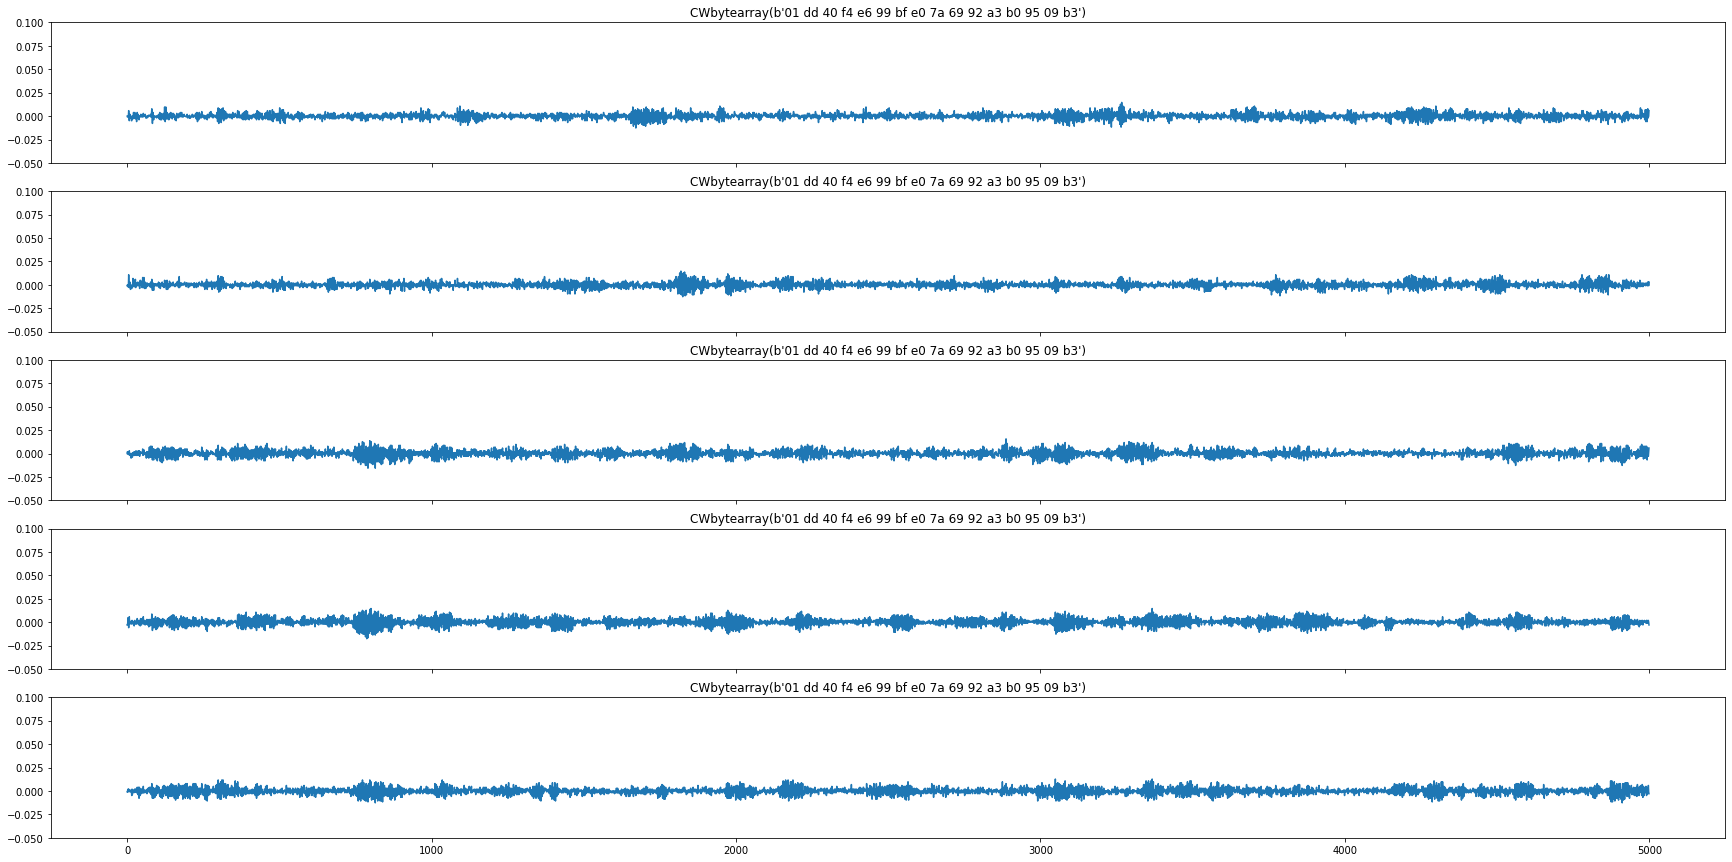

In [8]:
##Plot error
xShape = project.traces[0].wave.shape[0]
x=np.linspace(0,xShape-1, xShape)
savePath = "/home/manojgopale/Documents/chipwhisperer/jupyter/courses/sca201/img/sca201_images/" + prjName + "_error.jpg"

baseWave = project.traces[9].wave
fig, axs = plt.subplots(5, sharex=True, sharey=True, figsize=(30,15))
for i in range(5):
    targetWave = project.traces[i].wave
    axs[i].plot(x, baseWave-targetWave)
    axs[i].set_title(project.traces[i].key)
    axs[i].set_ylim([-0.05, 0.1])

#fig.savefig(savePath)

In [19]:
print(len(project.traces))
print(project.traces[0].key)
print(project.traces[1].key)

100
CWbytearray(b'ed 36 66 55 76 6d e6 d7 1a 3f 5d 67 f6 5a 4a 5f')
CWbytearray(b'fa dc e4 0c 24 3e 24 ed 78 fd 3d 89 8a 44 28 8f')


In [16]:
scope.dis()
target.dis()

In [28]:
##FFT
import scipy
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq

In [40]:
import chipwhisperer as cw
prjPath_1 = "/mnt/hgfs/trace_key_1500/key_100.cwp"
prj_1 = cw.open_project(prjPath_1)
print("Num traces = %s" %(len(prj_1.traces)))

Num traces = 8500


In [41]:
wave = prj_1.traces[0].wave
prj_1.traces[1000].key

array([100, 120, 159, 189, 229, 109, 244, 157,  90, 107, 248,  94,  63,
        92, 210, 219], dtype=uint8)

In [ ]:
##To remove DC component
print(wave)
wave = wave - wave.mean()
print(wave)

In [25]:
print(wave.shape)

(6000,)


In [42]:
scope.adc.decimate = 1
sample_rate = int(scope.clock.adc_rate)
total_samples = 1500
duration = total_samples/sample_rate

##total_samples = duration * sample_rate
print("sample_Rate=%s\nduration=%s\ntotal_samples=%s" %(sample_rate, duration, total_samples))
print("sample_rate=%s,\nduration=%s\ntotal_samples=%s" %(type(sample_rate), type(duration), type(total_samples)))

sample_Rate=29538459
duration=5.0781254364014044e-05
total_samples=1500
sample_rate=<class 'int'>,
duration=<class 'float'>
total_samples=<class 'int'>


In [43]:
yf = fft(wave)
xf = fftfreq(total_samples, 1/sample_rate)

In [33]:
yf

array([-7.10542736e-15-0.j        , -1.95778945e+00+3.58343891j,
       -5.41000082e+00+3.55089758j, ..., -4.54895464e+00+0.0122978j ,
       -5.41000082e+00-3.55089758j, -1.95778945e+00-3.58343891j])

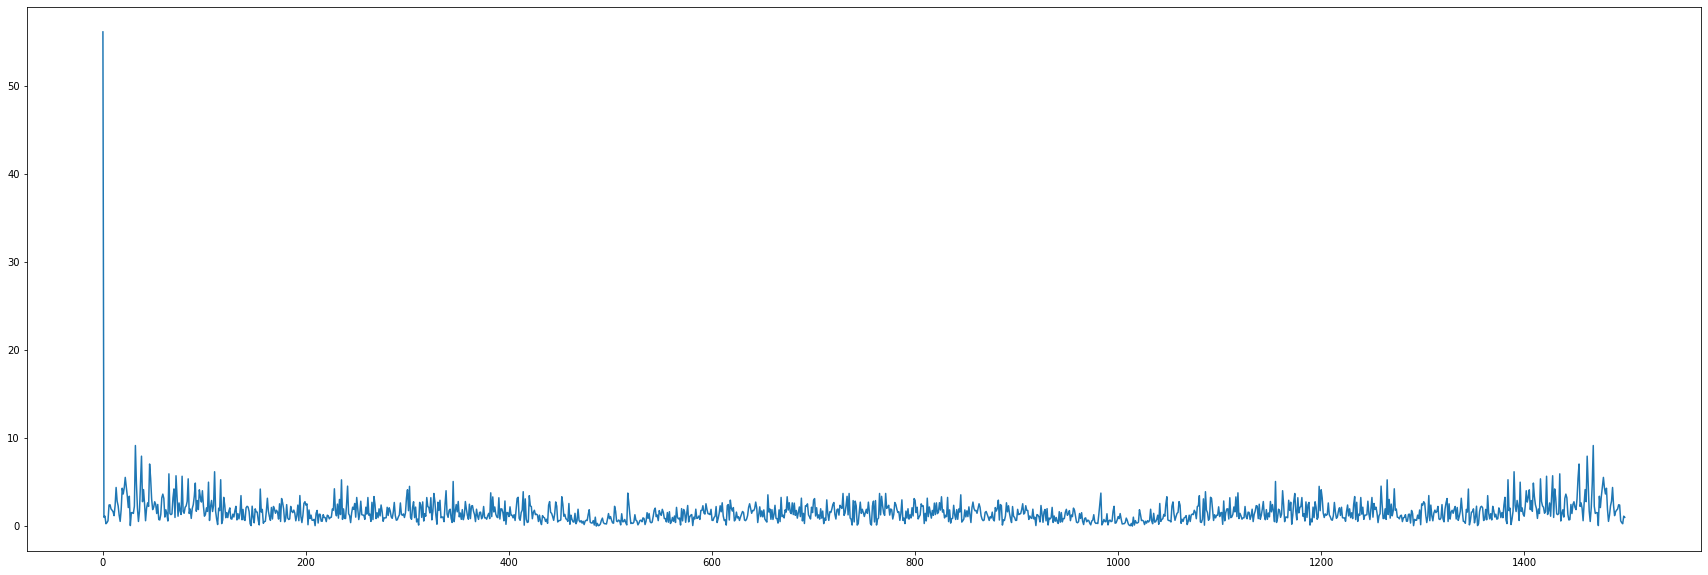

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(np.abs(yf))

[ 0.00195312 -0.00585938 -0.02050781 ... -0.01367188  0.00390625
 -0.06347656]
[-0.03548568 -0.04329818 -0.05794661 ... -0.05111068 -0.03353255
 -0.10091536]


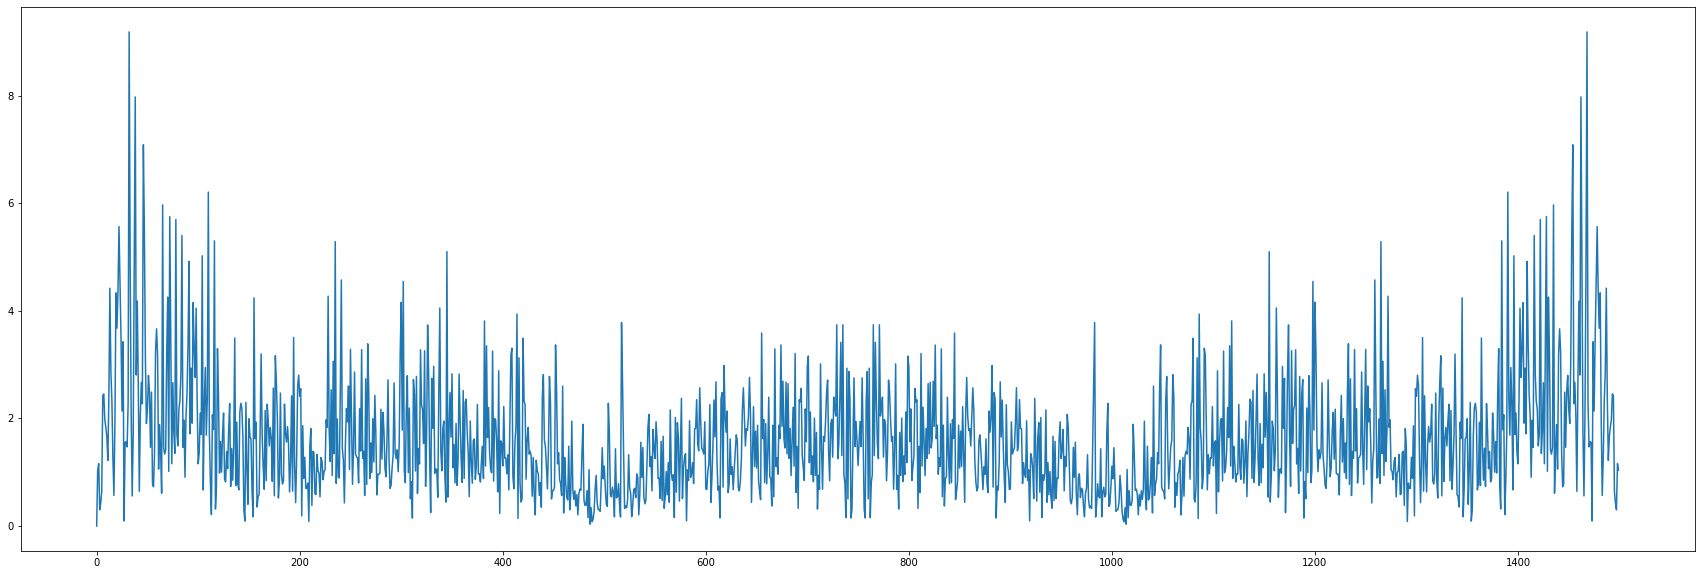

In [45]:
##To remove DC component
print(wave)
wave_noDC = wave - wave.mean()
print(wave_noDC)

yf = fft(wave_noDC)
xf = fftfreq(total_samples, 1/sample_rate)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(np.abs(yf))

In [15]:
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])

trainSize= 7500
devSize = 500
testSize = 500
# ##Adding traces for not complete 
# keysNotDone = [204, 228, 244, 245]
# count = 0
prjDir = "/mnt/hgfs/trace_key_l443/"
saveDir = "/mnt/hgfs/cw_l443_6000_dataset/"

for keyVal in trange(256, desc='Splitting data'):
    df_new = pd.DataFrame(columns=['trace', 'key'])
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
    
    ##Shuffle the dataframe before splitting in test, dev and train
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    ##Split it in train, dev and test
    df_train = df_new.iloc[0:trainSize, : ].reset_index(drop=True)
    df_dev   = df_new.iloc[trainSize:trainSize+devSize, : ].reset_index(drop=True)
    df_test  = df_new.iloc[trainSize+devSize:trainSize+devSize+testSize, : ].reset_index(drop=True)
    
    ##Save it to pkl
    saveTrain = saveDir + "/train_" + str(keyVal) + ".pkl.zip"
    saveDev   = saveDir + "/dev_" + str(keyVal) + ".pkl.zip"
    saveTest  = saveDir + "/test_" + str(keyVal) + ".pkl.zip"

    df_train.to_pickle(saveTrain)
    df_dev.to_pickle(saveDev)
    df_test.to_pickle(saveTest)

    print("Done saving files for key= %s" %(keyVal))
    ##Clean al dataframe's before next loop
    df_new = df_new.drop(df_new.columns, axis=1)


## Add these to the csv files.
print("Done saving all the traces\n")

Splitting data:   0%|                                                                                                                     | 0/256 [00:00<?, ?it/s]

Started key= 0


Splitting data:   0%|▍                                                                                                          | 1/256 [00:59<4:14:05, 59.79s/it]

Done saving files for key= 0
Started key= 1


Splitting data:   1%|▊                                                                                                          | 2/256 [02:01<4:17:33, 60.84s/it]

Done saving files for key= 1
Started key= 2


Splitting data:   1%|█▎                                                                                                         | 3/256 [03:01<4:15:14, 60.53s/it]

Done saving files for key= 2
Started key= 3


Splitting data:   2%|█▋                                                                                                         | 4/256 [04:00<4:11:39, 59.92s/it]

Done saving files for key= 3
Started key= 4


Splitting data:   2%|██                                                                                                         | 5/256 [05:00<4:11:31, 60.12s/it]

Done saving files for key= 4
Started key= 5


Splitting data:   2%|██▌                                                                                                        | 6/256 [06:00<4:09:01, 59.77s/it]

Done saving files for key= 5
Started key= 6


Splitting data:   3%|██▉                                                                                                        | 7/256 [06:59<4:08:13, 59.81s/it]

Done saving files for key= 6
Started key= 7


Splitting data:   3%|███▎                                                                                                       | 8/256 [07:59<4:07:03, 59.77s/it]

Done saving files for key= 7
Started key= 8


Splitting data:   4%|███▊                                                                                                       | 9/256 [08:59<4:06:09, 59.80s/it]

Done saving files for key= 8
Started key= 9


Splitting data:   4%|████▏                                                                                                     | 10/256 [09:58<4:04:06, 59.54s/it]

Done saving files for key= 9
Started key= 10


Splitting data:   4%|████▌                                                                                                     | 11/256 [10:58<4:03:57, 59.74s/it]

Done saving files for key= 10
Started key= 11


Splitting data:   5%|████▉                                                                                                     | 12/256 [11:57<4:01:46, 59.45s/it]

Done saving files for key= 11
Started key= 12


Splitting data:   5%|█████▍                                                                                                    | 13/256 [12:57<4:01:00, 59.51s/it]

Done saving files for key= 12
Started key= 13


Splitting data:   5%|█████▊                                                                                                    | 14/256 [13:55<3:59:09, 59.30s/it]

Done saving files for key= 13
Started key= 14


Splitting data:   6%|██████▏                                                                                                   | 15/256 [15:00<4:04:23, 60.84s/it]

Done saving files for key= 14
Started key= 15


Splitting data:   6%|██████▋                                                                                                   | 16/256 [15:58<3:59:36, 59.90s/it]

Done saving files for key= 15
Started key= 16


Splitting data:   7%|███████                                                                                                   | 17/256 [16:55<3:55:11, 59.04s/it]

Done saving files for key= 16
Started key= 17


Splitting data:   7%|███████▍                                                                                                  | 18/256 [17:50<3:50:13, 58.04s/it]

Done saving files for key= 17
Started key= 18


Splitting data:   7%|███████▊                                                                                                  | 19/256 [18:55<3:57:17, 60.07s/it]

Done saving files for key= 18
Started key= 19


Splitting data:   8%|████████▎                                                                                                 | 20/256 [20:08<4:11:17, 63.89s/it]

Done saving files for key= 19
Started key= 20


Splitting data:   8%|████████▋                                                                                                 | 21/256 [21:16<4:15:32, 65.24s/it]

Done saving files for key= 20
Started key= 21


Splitting data:   9%|█████████                                                                                                 | 22/256 [22:24<4:17:41, 66.08s/it]

Done saving files for key= 21
Started key= 22


Splitting data:   9%|█████████▌                                                                                                | 23/256 [23:34<4:20:38, 67.12s/it]

Done saving files for key= 22
Started key= 23


Splitting data:   9%|█████████▉                                                                                                | 24/256 [24:43<4:21:30, 67.63s/it]

Done saving files for key= 23
Started key= 24


Splitting data:  10%|██████████▎                                                                                               | 25/256 [25:54<4:24:53, 68.80s/it]

Done saving files for key= 24
Started key= 25


Splitting data:  10%|██████████▊                                                                                               | 26/256 [27:03<4:24:01, 68.87s/it]

Done saving files for key= 25
Started key= 26


Splitting data:  11%|███████████▏                                                                                              | 27/256 [28:12<4:22:17, 68.72s/it]

Done saving files for key= 26
Started key= 27


Splitting data:  11%|███████████▌                                                                                              | 28/256 [29:20<4:20:20, 68.51s/it]

Done saving files for key= 27
Started key= 28


Splitting data:  11%|████████████                                                                                              | 29/256 [30:27<4:18:18, 68.28s/it]

Done saving files for key= 28
Started key= 29


Splitting data:  12%|████████████▍                                                                                             | 30/256 [31:36<4:17:49, 68.45s/it]

Done saving files for key= 29
Started key= 30


Splitting data:  12%|████████████▊                                                                                             | 31/256 [32:46<4:18:04, 68.82s/it]

Done saving files for key= 30
Started key= 31


Splitting data:  12%|█████████████▎                                                                                            | 32/256 [33:55<4:16:38, 68.74s/it]

Done saving files for key= 31
Started key= 32


Splitting data:  13%|█████████████▋                                                                                            | 33/256 [35:05<4:17:14, 69.21s/it]

Done saving files for key= 32
Started key= 33


Splitting data:  13%|██████████████                                                                                            | 34/256 [36:13<4:15:04, 68.94s/it]

Done saving files for key= 33
Started key= 34


Splitting data:  14%|██████████████▍                                                                                           | 35/256 [37:21<4:12:48, 68.64s/it]

Done saving files for key= 34
Started key= 35


Splitting data:  14%|██████████████▉                                                                                           | 36/256 [38:29<4:10:45, 68.39s/it]

Done saving files for key= 35
Started key= 36


Splitting data:  14%|███████████████▎                                                                                          | 37/256 [39:37<4:09:07, 68.25s/it]

Done saving files for key= 36
Started key= 37


Splitting data:  15%|███████████████▋                                                                                          | 38/256 [40:44<4:07:08, 68.02s/it]

Done saving files for key= 37
Started key= 38


Splitting data:  15%|████████████████▏                                                                                         | 39/256 [41:52<4:05:13, 67.81s/it]

Done saving files for key= 38
Started key= 39


Splitting data:  16%|████████████████▌                                                                                         | 40/256 [42:58<4:02:17, 67.30s/it]

Done saving files for key= 39
Started key= 40


Splitting data:  16%|████████████████▉                                                                                         | 41/256 [44:06<4:02:17, 67.62s/it]

Done saving files for key= 40
Started key= 41


Splitting data:  16%|█████████████████▍                                                                                        | 42/256 [45:14<4:01:58, 67.84s/it]

Done saving files for key= 41
Started key= 42


Splitting data:  17%|█████████████████▊                                                                                        | 43/256 [46:23<4:01:46, 68.11s/it]

Done saving files for key= 42
Started key= 43


Splitting data:  17%|██████████████████▏                                                                                       | 44/256 [47:31<4:00:41, 68.12s/it]

Done saving files for key= 43
Started key= 44


Splitting data:  18%|██████████████████▋                                                                                       | 45/256 [48:40<4:00:32, 68.40s/it]

Done saving files for key= 44
Started key= 45


Splitting data:  18%|███████████████████                                                                                       | 46/256 [49:48<3:58:43, 68.21s/it]

Done saving files for key= 45
Started key= 46


Splitting data:  18%|███████████████████▍                                                                                      | 47/256 [50:54<3:54:44, 67.39s/it]

Done saving files for key= 46
Started key= 47


Splitting data:  19%|███████████████████▉                                                                                      | 48/256 [52:00<3:52:56, 67.20s/it]

Done saving files for key= 47
Started key= 48


Splitting data:  19%|████████████████████▎                                                                                     | 49/256 [53:09<3:53:24, 67.66s/it]

Done saving files for key= 48
Started key= 49


Splitting data:  20%|████████████████████▋                                                                                     | 50/256 [54:15<3:50:09, 67.04s/it]

Done saving files for key= 49
Started key= 50


Splitting data:  20%|█████████████████████                                                                                     | 51/256 [55:10<3:37:17, 63.60s/it]

Done saving files for key= 50
Started key= 51


Splitting data:  20%|█████████████████████▌                                                                                    | 52/256 [56:06<3:27:49, 61.13s/it]

Done saving files for key= 51
Started key= 52


Splitting data:  21%|█████████████████████▉                                                                                    | 53/256 [57:33<3:53:37, 69.05s/it]

Done saving files for key= 52
Started key= 53


Splitting data:  21%|██████████████████████▎                                                                                   | 54/256 [58:28<3:38:03, 64.77s/it]

Done saving files for key= 53
Started key= 54


Splitting data:  21%|██████████████████████▊                                                                                   | 55/256 [59:23<3:26:45, 61.72s/it]

Done saving files for key= 54
Started key= 55


Splitting data:  22%|██████████████████████▊                                                                                 | 56/256 [1:00:17<3:18:34, 59.57s/it]

Done saving files for key= 55
Started key= 56


Splitting data:  22%|███████████████████████▏                                                                                | 57/256 [1:01:12<3:12:30, 58.04s/it]

Done saving files for key= 56
Started key= 57


Splitting data:  23%|███████████████████████▌                                                                                | 58/256 [1:02:07<3:08:56, 57.25s/it]

Done saving files for key= 57
Started key= 58


Splitting data:  23%|███████████████████████▉                                                                                | 59/256 [1:03:04<3:07:41, 57.16s/it]

Done saving files for key= 58
Started key= 59


Splitting data:  23%|████████████████████████▍                                                                               | 60/256 [1:04:03<3:08:31, 57.71s/it]

Done saving files for key= 59
Started key= 60


Splitting data:  24%|████████████████████████▊                                                                               | 61/256 [1:05:02<3:09:10, 58.21s/it]

Done saving files for key= 60
Started key= 61


Splitting data:  24%|█████████████████████████▏                                                                              | 62/256 [1:06:02<3:09:23, 58.58s/it]

Done saving files for key= 61
Started key= 62


Splitting data:  25%|█████████████████████████▌                                                                              | 63/256 [1:07:00<3:08:21, 58.55s/it]

Done saving files for key= 62
Started key= 63


Splitting data:  25%|██████████████████████████                                                                              | 64/256 [1:07:58<3:07:03, 58.46s/it]

Done saving files for key= 63
Started key= 64


Splitting data:  25%|██████████████████████████▍                                                                             | 65/256 [1:08:57<3:06:07, 58.47s/it]

Done saving files for key= 64
Started key= 65


Splitting data:  26%|██████████████████████████▊                                                                             | 66/256 [1:09:55<3:04:53, 58.39s/it]

Done saving files for key= 65
Started key= 66


Splitting data:  26%|███████████████████████████▏                                                                            | 67/256 [1:10:53<3:03:36, 58.29s/it]

Done saving files for key= 66
Started key= 67


Splitting data:  27%|███████████████████████████▋                                                                            | 68/256 [1:11:52<3:02:51, 58.36s/it]

Done saving files for key= 67
Started key= 68


Splitting data:  27%|████████████████████████████                                                                            | 69/256 [1:12:51<3:02:45, 58.64s/it]

Done saving files for key= 68
Started key= 69


Splitting data:  27%|████████████████████████████▍                                                                           | 70/256 [1:13:49<3:00:47, 58.32s/it]

Done saving files for key= 69
Started key= 70


Splitting data:  28%|████████████████████████████▊                                                                           | 71/256 [1:14:45<2:57:49, 57.67s/it]

Done saving files for key= 70
Started key= 71


Splitting data:  28%|█████████████████████████████▎                                                                          | 72/256 [1:15:40<2:54:56, 57.05s/it]

Done saving files for key= 71
Started key= 72


Splitting data:  29%|█████████████████████████████▋                                                                          | 73/256 [1:16:37<2:53:20, 56.83s/it]

Done saving files for key= 72
Started key= 73


Splitting data:  29%|██████████████████████████████                                                                          | 74/256 [1:17:32<2:51:08, 56.42s/it]

Done saving files for key= 73
Started key= 74


Splitting data:  29%|██████████████████████████████▍                                                                         | 75/256 [1:18:29<2:50:30, 56.52s/it]

Done saving files for key= 74
Started key= 75


Splitting data:  30%|██████████████████████████████▉                                                                         | 76/256 [1:19:25<2:49:23, 56.46s/it]

Done saving files for key= 75
Started key= 76


Splitting data:  30%|███████████████████████████████▎                                                                        | 77/256 [1:20:22<2:49:01, 56.65s/it]

Done saving files for key= 76
Started key= 77


Splitting data:  30%|███████████████████████████████▋                                                                        | 78/256 [1:21:19<2:47:48, 56.56s/it]

Done saving files for key= 77
Started key= 78


Splitting data:  31%|████████████████████████████████                                                                        | 79/256 [1:22:15<2:46:36, 56.48s/it]

Done saving files for key= 78
Started key= 79


Splitting data:  31%|████████████████████████████████▌                                                                       | 80/256 [1:23:13<2:46:55, 56.91s/it]

Done saving files for key= 79
Started key= 80


Splitting data:  32%|████████████████████████████████▉                                                                       | 81/256 [1:24:11<2:47:28, 57.42s/it]

Done saving files for key= 80
Started key= 81


Splitting data:  32%|█████████████████████████████████▎                                                                      | 82/256 [1:25:09<2:46:18, 57.35s/it]

Done saving files for key= 81
Started key= 82


Splitting data:  32%|█████████████████████████████████▋                                                                      | 83/256 [1:26:06<2:45:00, 57.23s/it]

Done saving files for key= 82
Started key= 83


Splitting data:  33%|██████████████████████████████████▏                                                                     | 84/256 [1:27:02<2:43:37, 57.08s/it]

Done saving files for key= 83
Started key= 84


Splitting data:  33%|██████████████████████████████████▌                                                                     | 85/256 [1:28:00<2:42:59, 57.19s/it]

Done saving files for key= 84
Started key= 85


Splitting data:  34%|██████████████████████████████████▉                                                                     | 86/256 [1:28:57<2:41:56, 57.15s/it]

Done saving files for key= 85
Started key= 86


Splitting data:  34%|███████████████████████████████████▎                                                                    | 87/256 [1:29:53<2:39:47, 56.73s/it]

Done saving files for key= 86
Started key= 87


Splitting data:  34%|███████████████████████████████████▊                                                                    | 88/256 [1:30:49<2:38:46, 56.71s/it]

Done saving files for key= 87
Started key= 88


Splitting data:  35%|████████████████████████████████████▏                                                                   | 89/256 [1:31:46<2:38:03, 56.79s/it]

Done saving files for key= 88
Started key= 89


Splitting data:  35%|████████████████████████████████████▌                                                                   | 90/256 [1:32:44<2:37:45, 57.02s/it]

Done saving files for key= 89
Started key= 90


Splitting data:  36%|████████████████████████████████████▉                                                                   | 91/256 [1:33:42<2:37:24, 57.24s/it]

Done saving files for key= 90
Started key= 91


Splitting data:  36%|█████████████████████████████████████▍                                                                  | 92/256 [1:34:39<2:36:42, 57.34s/it]

Done saving files for key= 91
Started key= 92


Splitting data:  36%|█████████████████████████████████████▊                                                                  | 93/256 [1:35:37<2:36:06, 57.46s/it]

Done saving files for key= 92
Started key= 93


Splitting data:  37%|██████████████████████████████████████▏                                                                 | 94/256 [1:36:34<2:34:56, 57.38s/it]

Done saving files for key= 93
Started key= 94


Splitting data:  37%|██████████████████████████████████████▌                                                                 | 95/256 [1:37:31<2:33:31, 57.21s/it]

Done saving files for key= 94
Started key= 95


Splitting data:  38%|███████████████████████████████████████                                                                 | 96/256 [1:38:28<2:32:14, 57.09s/it]

Done saving files for key= 95
Started key= 96


Splitting data:  38%|███████████████████████████████████████▍                                                                | 97/256 [1:39:24<2:30:43, 56.88s/it]

Done saving files for key= 96
Started key= 97


Splitting data:  38%|███████████████████████████████████████▊                                                                | 98/256 [1:40:21<2:29:51, 56.91s/it]

Done saving files for key= 97
Started key= 98


Splitting data:  39%|████████████████████████████████████████▏                                                               | 99/256 [1:41:17<2:28:19, 56.68s/it]

Done saving files for key= 98
Started key= 99


Splitting data:  39%|████████████████████████████████████████▏                                                              | 100/256 [1:42:15<2:28:31, 57.12s/it]

Done saving files for key= 99
Started key= 100


Splitting data:  39%|████████████████████████████████████████▋                                                              | 101/256 [1:43:13<2:27:43, 57.18s/it]

Done saving files for key= 100
Started key= 101


Splitting data:  40%|█████████████████████████████████████████                                                              | 102/256 [1:44:11<2:27:26, 57.44s/it]

Done saving files for key= 101
Started key= 102


Splitting data:  40%|█████████████████████████████████████████▍                                                             | 103/256 [1:45:08<2:26:44, 57.54s/it]

Done saving files for key= 102
Started key= 103


Splitting data:  41%|█████████████████████████████████████████▊                                                             | 104/256 [1:46:05<2:25:21, 57.38s/it]

Done saving files for key= 103
Started key= 104


Splitting data:  41%|██████████████████████████████████████████▏                                                            | 105/256 [1:47:03<2:24:13, 57.31s/it]

Done saving files for key= 104
Started key= 105


Splitting data:  41%|██████████████████████████████████████████▋                                                            | 106/256 [1:48:00<2:23:16, 57.31s/it]

Done saving files for key= 105
Started key= 106


Splitting data:  42%|███████████████████████████████████████████                                                            | 107/256 [1:48:57<2:22:28, 57.37s/it]

Done saving files for key= 106
Started key= 107


Splitting data:  42%|███████████████████████████████████████████▍                                                           | 108/256 [1:49:54<2:21:02, 57.18s/it]

Done saving files for key= 107
Started key= 108


Splitting data:  43%|███████████████████████████████████████████▊                                                           | 109/256 [1:50:51<2:20:04, 57.17s/it]

Done saving files for key= 108
Started key= 109


Splitting data:  43%|████████████████████████████████████████████▎                                                          | 110/256 [1:51:49<2:19:08, 57.18s/it]

Done saving files for key= 109
Started key= 110


Splitting data:  43%|████████████████████████████████████████████▋                                                          | 111/256 [1:52:45<2:17:44, 57.00s/it]

Done saving files for key= 110
Started key= 111


Splitting data:  44%|█████████████████████████████████████████████                                                          | 112/256 [1:53:42<2:17:03, 57.11s/it]

Done saving files for key= 111
Started key= 112


Splitting data:  44%|█████████████████████████████████████████████▍                                                         | 113/256 [1:54:40<2:16:21, 57.21s/it]

Done saving files for key= 112
Started key= 113


Splitting data:  45%|█████████████████████████████████████████████▊                                                         | 114/256 [1:55:37<2:15:30, 57.26s/it]

Done saving files for key= 113
Started key= 114


Splitting data:  45%|██████████████████████████████████████████████▎                                                        | 115/256 [1:56:35<2:14:33, 57.26s/it]

Done saving files for key= 114
Started key= 115


Splitting data:  45%|██████████████████████████████████████████████▋                                                        | 116/256 [1:57:32<2:13:48, 57.35s/it]

Done saving files for key= 115
Started key= 116


Splitting data:  46%|███████████████████████████████████████████████                                                        | 117/256 [1:58:29<2:12:41, 57.28s/it]

Done saving files for key= 116
Started key= 117


Splitting data:  46%|███████████████████████████████████████████████▍                                                       | 118/256 [1:59:27<2:11:54, 57.35s/it]

Done saving files for key= 117
Started key= 118


Splitting data:  46%|███████████████████████████████████████████████▉                                                       | 119/256 [2:00:23<2:10:26, 57.13s/it]

Done saving files for key= 118
Started key= 119


Splitting data:  47%|████████████████████████████████████████████████▎                                                      | 120/256 [2:01:20<2:09:21, 57.07s/it]

Done saving files for key= 119
Started key= 120


Splitting data:  47%|████████████████████████████████████████████████▋                                                      | 121/256 [2:02:17<2:07:58, 56.88s/it]

Done saving files for key= 120
Started key= 121


Splitting data:  48%|█████████████████████████████████████████████████                                                      | 122/256 [2:03:14<2:07:27, 57.07s/it]

Done saving files for key= 121
Started key= 122


Splitting data:  48%|█████████████████████████████████████████████████▍                                                     | 123/256 [2:04:12<2:07:04, 57.32s/it]

Done saving files for key= 122
Started key= 123


Splitting data:  48%|█████████████████████████████████████████████████▉                                                     | 124/256 [2:05:10<2:06:40, 57.58s/it]

Done saving files for key= 123
Started key= 124


Splitting data:  49%|██████████████████████████████████████████████████▎                                                    | 125/256 [2:06:08<2:05:34, 57.51s/it]

Done saving files for key= 124
Started key= 125


Splitting data:  49%|██████████████████████████████████████████████████▋                                                    | 126/256 [2:07:05<2:04:33, 57.49s/it]

Done saving files for key= 125
Started key= 126


Splitting data:  50%|███████████████████████████████████████████████████                                                    | 127/256 [2:08:02<2:03:22, 57.38s/it]

Done saving files for key= 126
Started key= 127


Splitting data:  50%|███████████████████████████████████████████████████▌                                                   | 128/256 [2:09:00<2:02:24, 57.38s/it]

Done saving files for key= 127
Started key= 128


Splitting data:  50%|███████████████████████████████████████████████████▉                                                   | 129/256 [2:09:57<2:01:22, 57.34s/it]

Done saving files for key= 128
Started key= 129


Splitting data:  51%|████████████████████████████████████████████████████▎                                                  | 130/256 [2:10:53<1:59:54, 57.10s/it]

Done saving files for key= 129
Started key= 130


Splitting data:  51%|████████████████████████████████████████████████████▋                                                  | 131/256 [2:11:51<1:59:14, 57.23s/it]

Done saving files for key= 130
Started key= 131


Splitting data:  52%|█████████████████████████████████████████████████████                                                  | 132/256 [2:12:48<1:58:02, 57.12s/it]

Done saving files for key= 131
Started key= 132


Splitting data:  52%|█████████████████████████████████████████████████████▌                                                 | 133/256 [2:13:45<1:57:05, 57.11s/it]

Done saving files for key= 132
Started key= 133


Splitting data:  52%|█████████████████████████████████████████████████████▉                                                 | 134/256 [2:14:43<1:56:36, 57.35s/it]

Done saving files for key= 133
Started key= 134


Splitting data:  53%|██████████████████████████████████████████████████████▎                                                | 135/256 [2:15:41<1:55:59, 57.51s/it]

Done saving files for key= 134
Started key= 135


Splitting data:  53%|██████████████████████████████████████████████████████▋                                                | 136/256 [2:16:38<1:54:56, 57.47s/it]

Done saving files for key= 135
Started key= 136


Splitting data:  54%|███████████████████████████████████████████████████████                                                | 137/256 [2:17:35<1:53:34, 57.27s/it]

Done saving files for key= 136
Started key= 137


Splitting data:  54%|███████████████████████████████████████████████████████▌                                               | 138/256 [2:18:32<1:52:25, 57.17s/it]

Done saving files for key= 137
Started key= 138


Splitting data:  54%|███████████████████████████████████████████████████████▉                                               | 139/256 [2:19:29<1:51:33, 57.21s/it]

Done saving files for key= 138
Started key= 139


Splitting data:  55%|████████████████████████████████████████████████████████▎                                              | 140/256 [2:20:26<1:50:37, 57.22s/it]

Done saving files for key= 139
Started key= 140


Splitting data:  55%|████████████████████████████████████████████████████████▋                                              | 141/256 [2:21:23<1:49:36, 57.18s/it]

Done saving files for key= 140
Started key= 141


Splitting data:  55%|█████████████████████████████████████████████████████████▏                                             | 142/256 [2:22:20<1:48:29, 57.10s/it]

Done saving files for key= 141
Started key= 142


Splitting data:  56%|█████████████████████████████████████████████████████████▌                                             | 143/256 [2:23:18<1:47:35, 57.12s/it]

Done saving files for key= 142
Started key= 143


Splitting data:  56%|█████████████████████████████████████████████████████████▉                                             | 144/256 [2:24:15<1:46:48, 57.22s/it]

Done saving files for key= 143
Started key= 144


Splitting data:  57%|██████████████████████████████████████████████████████████▎                                            | 145/256 [2:25:13<1:46:15, 57.43s/it]

Done saving files for key= 144
Started key= 145


Splitting data:  57%|██████████████████████████████████████████████████████████▋                                            | 146/256 [2:26:11<1:45:24, 57.49s/it]

Done saving files for key= 145
Started key= 146


Splitting data:  57%|███████████████████████████████████████████████████████████▏                                           | 147/256 [2:27:08<1:44:29, 57.52s/it]

Done saving files for key= 146
Started key= 147


Splitting data:  58%|███████████████████████████████████████████████████████████▌                                           | 148/256 [2:28:05<1:43:25, 57.46s/it]

Done saving files for key= 147
Started key= 148


Splitting data:  58%|███████████████████████████████████████████████████████████▉                                           | 149/256 [2:29:03<1:42:37, 57.55s/it]

Done saving files for key= 148
Started key= 149


Splitting data:  59%|████████████████████████████████████████████████████████████▎                                          | 150/256 [2:30:00<1:41:24, 57.40s/it]

Done saving files for key= 149
Started key= 150


Splitting data:  59%|████████████████████████████████████████████████████████████▊                                          | 151/256 [2:30:58<1:40:23, 57.37s/it]

Done saving files for key= 150
Started key= 151


Splitting data:  59%|█████████████████████████████████████████████████████████████▏                                         | 152/256 [2:31:55<1:39:21, 57.32s/it]

Done saving files for key= 151
Started key= 152


Splitting data:  60%|█████████████████████████████████████████████████████████████▌                                         | 153/256 [2:32:51<1:38:03, 57.12s/it]

Done saving files for key= 152
Started key= 153


Splitting data:  60%|█████████████████████████████████████████████████████████████▉                                         | 154/256 [2:33:48<1:36:52, 56.98s/it]

Done saving files for key= 153
Started key= 154


Splitting data:  61%|██████████████████████████████████████████████████████████████▎                                        | 155/256 [2:34:45<1:35:47, 56.90s/it]

Done saving files for key= 154
Started key= 155


Splitting data:  61%|██████████████████████████████████████████████████████████████▊                                        | 156/256 [2:35:43<1:35:16, 57.17s/it]

Done saving files for key= 155
Started key= 156


Splitting data:  61%|███████████████████████████████████████████████████████████████▏                                       | 157/256 [2:36:40<1:34:29, 57.26s/it]

Done saving files for key= 156
Started key= 157


Splitting data:  62%|███████████████████████████████████████████████████████████████▌                                       | 158/256 [2:37:37<1:33:34, 57.29s/it]

Done saving files for key= 157
Started key= 158


Splitting data:  62%|███████████████████████████████████████████████████████████████▉                                       | 159/256 [2:38:35<1:32:43, 57.35s/it]

Done saving files for key= 158
Started key= 159


Splitting data:  62%|████████████████████████████████████████████████████████████████▍                                      | 160/256 [2:39:32<1:31:34, 57.23s/it]

Done saving files for key= 159
Started key= 160


Splitting data:  63%|████████████████████████████████████████████████████████████████▊                                      | 161/256 [2:40:29<1:30:34, 57.20s/it]

Done saving files for key= 160
Started key= 161


Splitting data:  63%|█████████████████████████████████████████████████████████████████▏                                     | 162/256 [2:41:26<1:29:18, 57.00s/it]

Done saving files for key= 161
Started key= 162


Splitting data:  64%|█████████████████████████████████████████████████████████████████▌                                     | 163/256 [2:42:22<1:28:15, 56.94s/it]

Done saving files for key= 162
Started key= 163


Splitting data:  64%|█████████████████████████████████████████████████████████████████▉                                     | 164/256 [2:43:19<1:27:01, 56.76s/it]

Done saving files for key= 163
Started key= 164


Splitting data:  64%|██████████████████████████████████████████████████████████████████▍                                    | 165/256 [2:44:15<1:26:05, 56.76s/it]

Done saving files for key= 164
Started key= 165


Splitting data:  65%|██████████████████████████████████████████████████████████████████▊                                    | 166/256 [2:45:12<1:25:16, 56.84s/it]

Done saving files for key= 165
Started key= 166


Splitting data:  65%|███████████████████████████████████████████████████████████████████▏                                   | 167/256 [2:46:10<1:24:46, 57.15s/it]

Done saving files for key= 166
Started key= 167


Splitting data:  66%|███████████████████████████████████████████████████████████████████▌                                   | 168/256 [2:47:08<1:24:09, 57.38s/it]

Done saving files for key= 167
Started key= 168


Splitting data:  66%|███████████████████████████████████████████████████████████████████▉                                   | 169/256 [2:48:05<1:23:03, 57.28s/it]

Done saving files for key= 168
Started key= 169


Splitting data:  66%|████████████████████████████████████████████████████████████████████▍                                  | 170/256 [2:49:03<1:22:05, 57.28s/it]

Done saving files for key= 169
Started key= 170


Splitting data:  67%|████████████████████████████████████████████████████████████████████▊                                  | 171/256 [2:50:00<1:21:19, 57.41s/it]

Done saving files for key= 170
Started key= 171


Splitting data:  67%|█████████████████████████████████████████████████████████████████████▏                                 | 172/256 [2:50:58<1:20:27, 57.47s/it]

Done saving files for key= 171
Started key= 172


Splitting data:  68%|█████████████████████████████████████████████████████████████████████▌                                 | 173/256 [2:51:55<1:19:21, 57.36s/it]

Done saving files for key= 172
Started key= 173


Splitting data:  68%|██████████████████████████████████████████████████████████████████████                                 | 174/256 [2:52:51<1:17:57, 57.04s/it]

Done saving files for key= 173
Started key= 174


Splitting data:  68%|██████████████████████████████████████████████████████████████████████▍                                | 175/256 [2:53:48<1:16:46, 56.87s/it]

Done saving files for key= 174
Started key= 175


Splitting data:  69%|██████████████████████████████████████████████████████████████████████▊                                | 176/256 [2:54:45<1:16:02, 57.03s/it]

Done saving files for key= 175
Started key= 176


Splitting data:  69%|███████████████████████████████████████████████████████████████████████▏                               | 177/256 [2:55:44<1:15:50, 57.60s/it]

Done saving files for key= 176
Started key= 177


Splitting data:  70%|███████████████████████████████████████████████████████████████████████▌                               | 178/256 [2:56:42<1:14:53, 57.61s/it]

Done saving files for key= 177
Started key= 178


Splitting data:  70%|████████████████████████████████████████████████████████████████████████                               | 179/256 [2:57:38<1:13:29, 57.27s/it]

Done saving files for key= 178
Started key= 179


Splitting data:  70%|████████████████████████████████████████████████████████████████████████▍                              | 180/256 [2:58:36<1:12:44, 57.43s/it]

Done saving files for key= 179
Started key= 180


Splitting data:  71%|████████████████████████████████████████████████████████████████████████▊                              | 181/256 [2:59:33<1:11:40, 57.34s/it]

Done saving files for key= 180
Started key= 181


Splitting data:  71%|█████████████████████████████████████████████████████████████████████████▏                             | 182/256 [3:00:31<1:10:53, 57.48s/it]

Done saving files for key= 181
Started key= 182


Splitting data:  71%|█████████████████████████████████████████████████████████████████████████▋                             | 183/256 [3:01:28<1:09:40, 57.26s/it]

Done saving files for key= 182
Started key= 183


Splitting data:  72%|██████████████████████████████████████████████████████████████████████████                             | 184/256 [3:02:25<1:08:42, 57.26s/it]

Done saving files for key= 183
Started key= 184


Splitting data:  72%|██████████████████████████████████████████████████████████████████████████▍                            | 185/256 [3:03:22<1:07:31, 57.07s/it]

Done saving files for key= 184
Started key= 185


Splitting data:  73%|██████████████████████████████████████████████████████████████████████████▊                            | 186/256 [3:04:19<1:06:44, 57.21s/it]

Done saving files for key= 185
Started key= 186


Splitting data:  73%|███████████████████████████████████████████████████████████████████████████▏                           | 187/256 [3:05:16<1:05:46, 57.20s/it]

Done saving files for key= 186
Started key= 187


Splitting data:  73%|███████████████████████████████████████████████████████████████████████████▋                           | 188/256 [3:06:14<1:04:58, 57.34s/it]

Done saving files for key= 187
Started key= 188


Splitting data:  74%|████████████████████████████████████████████████████████████████████████████                           | 189/256 [3:07:11<1:03:57, 57.28s/it]

Done saving files for key= 188
Started key= 189


Splitting data:  74%|████████████████████████████████████████████████████████████████████████████▍                          | 190/256 [3:08:10<1:03:29, 57.72s/it]

Done saving files for key= 189
Started key= 190


Splitting data:  75%|████████████████████████████████████████████████████████████████████████████▊                          | 191/256 [3:09:08<1:02:32, 57.73s/it]

Done saving files for key= 190
Started key= 191


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████▎                         | 192/256 [3:10:06<1:01:41, 57.84s/it]

Done saving files for key= 191
Started key= 192


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████▋                         | 193/256 [3:11:03<1:00:27, 57.59s/it]

Done saving files for key= 192
Started key= 193


Splitting data:  76%|███████████████████████████████████████████████████████████████████████████████▌                         | 194/256 [3:12:00<59:25, 57.51s/it]

Done saving files for key= 193
Started key= 194


Splitting data:  76%|███████████████████████████████████████████████████████████████████████████████▉                         | 195/256 [3:12:57<58:20, 57.39s/it]

Done saving files for key= 194
Started key= 195


Splitting data:  77%|████████████████████████████████████████████████████████████████████████████████▍                        | 196/256 [3:13:54<57:16, 57.28s/it]

Done saving files for key= 195
Started key= 196


Splitting data:  77%|████████████████████████████████████████████████████████████████████████████████▊                        | 197/256 [3:14:51<56:09, 57.11s/it]

Done saving files for key= 196
Started key= 197


Splitting data:  77%|█████████████████████████████████████████████████████████████████████████████████▏                       | 198/256 [3:15:47<54:58, 56.88s/it]

Done saving files for key= 197
Started key= 198


Splitting data:  78%|█████████████████████████████████████████████████████████████████████████████████▌                       | 199/256 [3:16:44<54:03, 56.90s/it]

Done saving files for key= 198
Started key= 199


Splitting data:  78%|██████████████████████████████████████████████████████████████████████████████████                       | 200/256 [3:17:42<53:16, 57.08s/it]

Done saving files for key= 199
Started key= 200


Splitting data:  79%|██████████████████████████████████████████████████████████████████████████████████▍                      | 201/256 [3:18:39<52:27, 57.24s/it]

Done saving files for key= 200
Started key= 201


Splitting data:  79%|██████████████████████████████████████████████████████████████████████████████████▊                      | 202/256 [3:19:37<51:33, 57.28s/it]

Done saving files for key= 201
Started key= 202


Splitting data:  79%|███████████████████████████████████████████████████████████████████████████████████▎                     | 203/256 [3:20:34<50:41, 57.38s/it]

Done saving files for key= 202
Started key= 203


Splitting data:  80%|███████████████████████████████████████████████████████████████████████████████████▋                     | 204/256 [3:21:32<49:44, 57.39s/it]

Done saving files for key= 203
Started key= 204


Splitting data:  80%|████████████████████████████████████████████████████████████████████████████████████                     | 205/256 [3:22:29<48:48, 57.43s/it]

Done saving files for key= 204
Started key= 205


Splitting data:  80%|████████████████████████████████████████████████████████████████████████████████████▍                    | 206/256 [3:23:26<47:46, 57.32s/it]

Done saving files for key= 205
Started key= 206


Splitting data:  81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 207/256 [3:24:24<46:48, 57.32s/it]

Done saving files for key= 206
Started key= 207


Splitting data:  81%|█████████████████████████████████████████████████████████████████████████████████████▎                   | 208/256 [3:25:21<45:49, 57.28s/it]

Done saving files for key= 207
Started key= 208


Splitting data:  82%|█████████████████████████████████████████████████████████████████████████████████████▋                   | 209/256 [3:26:17<44:40, 57.04s/it]

Done saving files for key= 208
Started key= 209


Splitting data:  82%|██████████████████████████████████████████████████████████████████████████████████████▏                  | 210/256 [3:27:14<43:43, 57.03s/it]

Done saving files for key= 209
Started key= 210


Splitting data:  82%|██████████████████████████████████████████████████████████████████████████████████████▌                  | 211/256 [3:28:12<42:58, 57.31s/it]

Done saving files for key= 210
Started key= 211


Splitting data:  83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 212/256 [3:29:10<42:09, 57.48s/it]

Done saving files for key= 211
Started key= 212


Splitting data:  83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 213/256 [3:30:07<41:08, 57.41s/it]

Done saving files for key= 212
Started key= 213


Splitting data:  84%|███████████████████████████████████████████████████████████████████████████████████████▊                 | 214/256 [3:31:05<40:14, 57.49s/it]

Done saving files for key= 213
Started key= 214


Splitting data:  84%|████████████████████████████████████████████████████████████████████████████████████████▏                | 215/256 [3:32:02<39:11, 57.35s/it]

Done saving files for key= 214
Started key= 215


Splitting data:  84%|████████████████████████████████████████████████████████████████████████████████████████▌                | 216/256 [3:33:00<38:26, 57.67s/it]

Done saving files for key= 215
Started key= 216


Splitting data:  85%|█████████████████████████████████████████████████████████████████████████████████████████                | 217/256 [3:33:58<37:23, 57.52s/it]

Done saving files for key= 216
Started key= 217


Splitting data:  85%|█████████████████████████████████████████████████████████████████████████████████████████▍               | 218/256 [3:34:55<36:26, 57.54s/it]

Done saving files for key= 217
Started key= 218


Splitting data:  86%|█████████████████████████████████████████████████████████████████████████████████████████▊               | 219/256 [3:35:52<35:17, 57.23s/it]

Done saving files for key= 218
Started key= 219


Splitting data:  86%|██████████████████████████████████████████████████████████████████████████████████████████▏              | 220/256 [3:36:49<34:20, 57.24s/it]

Done saving files for key= 219
Started key= 220


Splitting data:  86%|██████████████████████████████████████████████████████████████████████████████████████████▋              | 221/256 [3:37:45<33:15, 57.02s/it]

Done saving files for key= 220
Started key= 221


Splitting data:  87%|███████████████████████████████████████████████████████████████████████████████████████████              | 222/256 [3:38:44<32:30, 57.36s/it]

Done saving files for key= 221
Started key= 222


Splitting data:  87%|███████████████████████████████████████████████████████████████████████████████████████████▍             | 223/256 [3:39:41<31:30, 57.30s/it]

Done saving files for key= 222
Started key= 223


Splitting data:  88%|███████████████████████████████████████████████████████████████████████████████████████████▉             | 224/256 [3:40:38<30:36, 57.39s/it]

Done saving files for key= 223
Started key= 224


Splitting data:  88%|████████████████████████████████████████████████████████████████████████████████████████████▎            | 225/256 [3:41:36<29:42, 57.49s/it]

Done saving files for key= 224
Started key= 225


Splitting data:  88%|████████████████████████████████████████████████████████████████████████████████████████████▋            | 226/256 [3:42:34<28:48, 57.63s/it]

Done saving files for key= 225
Started key= 226


Splitting data:  89%|█████████████████████████████████████████████████████████████████████████████████████████████            | 227/256 [3:43:32<27:53, 57.70s/it]

Done saving files for key= 226
Started key= 227


Splitting data:  89%|█████████████████████████████████████████████████████████████████████████████████████████████▌           | 228/256 [3:44:29<26:50, 57.51s/it]

Done saving files for key= 227
Started key= 228


Splitting data:  89%|█████████████████████████████████████████████████████████████████████████████████████████████▉           | 229/256 [3:45:26<25:50, 57.44s/it]

Done saving files for key= 228
Started key= 229


Splitting data:  90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 230/256 [3:46:23<24:46, 57.17s/it]

Done saving files for key= 229
Started key= 230


Splitting data:  90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 231/256 [3:47:20<23:51, 57.26s/it]

Done saving files for key= 230
Started key= 231


Splitting data:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▏         | 232/256 [3:48:17<22:49, 57.07s/it]

Done saving files for key= 231
Started key= 232


Splitting data:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 233/256 [3:49:15<21:58, 57.34s/it]

Done saving files for key= 232
Started key= 233


Splitting data:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▉         | 234/256 [3:50:13<21:04, 57.49s/it]

Done saving files for key= 233
Started key= 234


Splitting data:  92%|████████████████████████████████████████████████████████████████████████████████████████████████▍        | 235/256 [3:51:12<20:18, 58.02s/it]

Done saving files for key= 234
Started key= 235


Splitting data:  92%|████████████████████████████████████████████████████████████████████████████████████████████████▊        | 236/256 [3:52:10<19:18, 57.93s/it]

Done saving files for key= 235
Started key= 236


Splitting data:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████▏       | 237/256 [3:53:08<18:20, 57.91s/it]

Done saving files for key= 236
Started key= 237


Splitting data:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████▌       | 238/256 [3:54:05<17:17, 57.66s/it]

Done saving files for key= 237
Started key= 238


Splitting data:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████       | 239/256 [3:55:02<16:16, 57.44s/it]

Done saving files for key= 238
Started key= 239


Splitting data:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████▍      | 240/256 [3:56:00<15:23, 57.69s/it]

Done saving files for key= 239
Started key= 240


Splitting data:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████▊      | 241/256 [3:56:57<14:20, 57.40s/it]

Done saving files for key= 240
Started key= 241


Splitting data:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████▎     | 242/256 [3:57:55<13:25, 57.57s/it]

Done saving files for key= 241
Started key= 242


Splitting data:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████▋     | 243/256 [3:58:54<12:35, 58.13s/it]

Done saving files for key= 242
Started key= 243


Splitting data:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████     | 244/256 [3:59:51<11:32, 57.69s/it]

Done saving files for key= 243
Started key= 244


Splitting data:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 245/256 [4:00:47<10:30, 57.32s/it]

Done saving files for key= 244
Started key= 245


Splitting data:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 246/256 [4:01:44<09:32, 57.24s/it]

Done saving files for key= 245
Started key= 246


Splitting data:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 247/256 [4:02:41<08:35, 57.24s/it]

Done saving files for key= 246
Started key= 247


Splitting data:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 248/256 [4:03:37<07:34, 56.87s/it]

Done saving files for key= 247
Started key= 248


Splitting data:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 249/256 [4:04:35<06:39, 57.04s/it]

Done saving files for key= 248
Started key= 249


Splitting data:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 250/256 [4:05:32<05:42, 57.16s/it]

Done saving files for key= 249
Started key= 250


Splitting data:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 251/256 [4:06:30<04:46, 57.34s/it]

Done saving files for key= 250
Started key= 251


Splitting data:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 252/256 [4:07:27<03:48, 57.20s/it]

Done saving files for key= 251
Started key= 252


Splitting data:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 253/256 [4:08:25<02:52, 57.39s/it]

Done saving files for key= 252
Started key= 253


Splitting data:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 254/256 [4:09:21<01:54, 57.15s/it]

Done saving files for key= 253
Started key= 254


Splitting data: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 255/256 [4:10:18<00:57, 57.13s/it]

Done saving files for key= 254
Started key= 255


Splitting data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [4:11:15<00:00, 58.89s/it]

Done saving files for key= 255
Done saving all the traces



In [21]:
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])

prjDir = "/mnt/hgfs/trace_key_f0/"
saveDir = "/mnt/hgfs/trace_key_f0/"

##--Keys 0 and 1 are from STMF32_F303 device.
##--Keys 2 and 3 are from STM32_F415 device

for keyVal in trange(4, desc='Splitting data'):
    #df_new = pd.DataFrame(columns=['trace', 'key'])
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
    
##Shuffle the dataframe before splitting in test, dev and train
#df_new = df_new.sample(frac=1).reset_index(drop=True)

##Save it to pkl
saveTrain = saveDir + "/train_trials.pkl.zip"

df_new.to_pickle(saveTrain)

#print("Done saving files for key= %s" %(keyVal))
##Clean al dataframe's before next loop


## Add these to the csv files.
print("Done saving all the traces\n")

Splitting data:  25%|███████████████████████████████▎                                                                                             | 1/4 [00:00<00:00,  5.21it/s]

Started key= 0
Started key= 1


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████████████████████▊                               | 3/4 [00:00<00:00,  5.33it/s]

Started key= 2
Started key= 3


Splitting data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.35it/s]


Done saving all the traces



In [1]:
##Check the files
import pandas as pd
tr254_path= "/mnt/hgfs/trace_pkl_6000/train_254.pkl.zip"
tr254 = pd.read_pickle(tr254_path)
tr254.head()

,trace,key
0,"[0.04296875, -0.0927734375, -0.068359375, -0.0...","[254, 139, 96, 17, 158, 218, 46, 243, 89, 158,..."
1,"[0.0419921875, -0.0908203125, -0.0654296875, -...","[254, 27, 227, 120, 64, 50, 65, 174, 83, 74, 2..."
2,"[0.0400390625, -0.09765625, -0.0712890625, -0....","[254, 9, 178, 168, 11, 191, 168, 240, 42, 30, ..."
3,"[0.0439453125, -0.091796875, -0.0693359375, -0...","[254, 232, 27, 142, 10, 101, 236, 129, 108, 10..."
4,"[0.04296875, -0.0927734375, -0.072265625, -0.0...","[254, 13, 133, 38, 160, 71, 21, 184, 88, 242, ..."


In [16]:
##Save data for oral ppt
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])


prjDir = "/mnt/hgfs/trace_oral_ppt/"
saveDir = "/mnt/hgfs/trace_oral_ppt/"

for keyVal in trange(5, desc='Splitting data'):
    df_new = pd.DataFrame(columns=['trace', 'key'])
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
    
    ##Shuffle the dataframe before splitting in test, dev and train
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    ##Split it in train, dev and test
    df_train = df_new.reset_index(drop=True)
    
    saveTrain = saveDir + "/train_" + str(keyVal) + ".pkl.zip"
    df_train.to_pickle(saveTrain)
    
    print("Done saving files for key= %s" %(keyVal))
    ##Clean al dataframe's before next loop
    df_new = df_new.drop(df_new.columns, axis=1)
    
print("Done saving all the traces\n")
    

Splitting data:   0%|                                                                                                             | 0/5 [00:00<?, ?it/s]

Started key= 0


Splitting data:  20%|████████████████████▏                                                                                | 1/5 [00:00<00:03,  1.08it/s]

Done saving files for key= 0
Started key= 1


Splitting data:  40%|████████████████████████████████████████▍                                                            | 2/5 [00:01<00:02,  1.20it/s]

Done saving files for key= 1
Started key= 2


Splitting data:  60%|████████████████████████████████████████████████████████████▌                                        | 3/5 [00:02<00:01,  1.24it/s]

Done saving files for key= 2
Started key= 3


Splitting data:  80%|████████████████████████████████████████████████████████████████████████████████▊                    | 4/5 [00:03<00:00,  1.21it/s]

Done saving files for key= 3
Started key= 4


Splitting data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.18it/s]

Done saving files for key= 4
Done saving all the traces



In [22]:
train_pkl = pd.read_pickle(saveTrain)
print(train_pkl.head())
print(train_pkl.shape)

dev_pkl = pd.read_pickle(saveDev)
print(dev_pkl.head())
print(dev_pkl.shape)

test_pkl = pd.read_pickle(saveTest)
print(test_pkl.head())
print(test_pkl.shape)

                                               trace  \
0  [0.0419921875, -0.0927734375, -0.0693359375, -...   
1  [0.04296875, -0.0908203125, -0.0654296875, -0....   
2  [0.0439453125, -0.095703125, -0.0703125, -0.01...   
3  [0.044921875, -0.0927734375, -0.0693359375, -0...   
4  [0.0419921875, -0.09375, -0.0703125, -0.017578...   

                                                 key  
0  [255, 245, 47, 202, 202, 248, 23, 233, 208, 96...  
1  [255, 126, 167, 234, 20, 216, 44, 117, 216, 15...  
2  [255, 90, 215, 78, 28, 148, 216, 43, 89, 2, 35...  
3  [255, 255, 254, 239, 83, 91, 166, 138, 182, 11...  
4  [255, 201, 49, 170, 148, 224, 51, 26, 48, 74, ...  
(7500, 2)
                                               trace  \
0  [0.04296875, -0.0947265625, -0.068359375, -0.0...   
1  [0.0419921875, -0.0966796875, -0.0693359375, -...   
2  [0.0419921875, -0.0947265625, -0.0693359375, -...   
3  [0.04296875, -0.0966796875, -0.0693359375, -0....   
4  [0.0419921875, -0.0927734375, -0.0693359

In [17]:
pd.__version__

'1.3.4'

In [19]:
from platform import python_version
print(python_version())

3.7.10


In [21]:
##Print Image
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [22]:
##Save data as npz
keyVal = 3
key3_df = pd.read_pickle(saveDir + "/train_" + str(keyVal) + ".pkl.zip")
key3_df.head()

,trace,key
0,"[0.0380859375, -0.0615234375, -0.0361328125, 0...","[3, 242, 3, 20, 142, 210, 27, 131, 253, 32, 10..."
1,"[0.0654296875, -0.0546875, -0.033203125, 0.006...","[3, 167, 161, 218, 52, 18, 106, 142, 103, 171,..."
2,"[0.0009765625, -0.1103515625, -0.0517578125, -...","[3, 119, 164, 123, 162, 68, 38, 250, 214, 215,..."
3,"[-0.01953125, -0.1318359375, -0.07421875, -0.0...","[3, 171, 196, 10, 110, 118, 81, 24, 10, 125, 1..."
4,"[-0.0078125, -0.2060546875, -0.0947265625, -0....","[3, 171, 208, 173, 61, 247, 96, 250, 88, 207, ..."


In [29]:
key3_np = key3_df.trace.apply(pd.Series).to_numpy()

In [30]:
##Save to npz 
npzFile = saveDir + "/train_" + str(keyVal) + ".npz"
np.savez_compressed(npzFile, x_train=key3_np)